# Tarea Examen

# Problema 1

1. Se tiene un oscilador armónico en dos dimensiones (xy) el que la fuerza está dada por $\vec F= -k\vec r$ y se
tiene una fricción $\vec{f_{fric}} = −\gamma\vec v$ si $| \vec v| < 1$, pero cuando $|\vec v| > 1$ la fricción es $\vec{f_{fric}} = −\mu v^{3/2}\hat v$. Si $m = 1$,
$\gamma = 0.1$ y $\mu = 0.2$, resuelva las siguientes ejercicios:

(a) Encuentre las ecuaciones de movimiento en coordenadas cartesianas y polares.

EN CARTESIANAS:

La fuerza en coordenadas cartesianas es:

Cuando $| \vec v| < 1$ : 
$$
\begin{aligned}
F_x&= -kx −\gamma v_x\\
F_y&= -ky −\gamma v_y\\
\end{aligned}
$$

Teniendo en cuenta que $\hat v = \vec v /v$, cuando $| \vec v| > 1$ : 
$$
\begin{aligned}
F_x&= -kx −\mu v^{1/4}v_x\\
F_y&= -ky −\mu v^{1/4}v_y\\
\end{aligned}
$$

Por la segunda ley de Newton obtenemos entonces que las ecuaciones de movimiento en cartesianas son:

Cuando $| \vec v| < 1$ : 
$$
\begin{aligned}
m \dot {v_x}&= -kx −\gamma \dot x\\
m \dot {v_y}&= -ky −\gamma \dot y\\
\end{aligned}
$$


Cuando $| \vec v| > 1$ : 
$$
\begin{aligned}
m \dot {v_x}&= -kx −\mu (\dot x^2+\dot y^2)^{1/4}v_x\\
m \dot {v_y}&= -ky −\mu (\dot x^2+\dot y^2)^{1/4}v_y\\
\end{aligned}
$$

EN POLARES: 

La velocidad de la partícula puede ser escrita como $\vec v = v_r \hat r +v_{\theta} \hat{\theta} =\dot r \hat r + r\dot{\theta} \hat{\theta}$. Así, las componentes de la fuerza en la dirección radial y angular son:

Cuando $| \vec v| < 1$ : 
$$
\begin{aligned}
F_r&= -kr −\gamma \dot r\\
F_{\theta}&=  −\gamma r \dot{\theta}\\
\end{aligned}
$$

Cuando $| \vec v| > 1$ : 

$$
\begin{aligned}
F_r&= -kr −\mu v^{1/2}\dot r = -kr  −\mu (\dot r^2 +r^2 \dot{\theta}^2)^{1/4}\dot r  \\
F_{\theta}&= −\mu (\dot r^2 +r^2 \dot{\theta}^2)^{1/4}r \dot{\theta} \\
\end{aligned}
$$

El vector de aceleración en polares es $\vec a = \dot{\vec v}=\ddot r \hat r +r \dot{ \hat r} +\dot{(r \dot{\theta})} \hat{\theta} + r \dot{\theta} \dot{\hat{\theta}}$. Se tiene que $\hat r = cos\theta \hat x +  sen\theta \hat y$ y $\hat{\theta} = cos\theta \hat y -  sen\theta \hat x$, por lo que 

$$
\begin{aligned}
\dot{ \hat r} = \dot{\theta} (-sen\theta \hat x+cos\theta \hat y)=\dot{\theta} \hat{\theta}\\
\dot{\hat{\theta}} =  \dot{\theta} (-sen\theta \hat y-cos\theta \hat x) = -\dot{\theta} \hat r
\end{aligned}
$$

Entonces $\vec a = \ddot r \hat r +r \dot{\theta} \hat{\theta} + (\dot r \dot{\theta} +r \ddot{\theta}) \hat{\theta} + r \dot{\theta} (-\dot{\theta} \hat r)=(\ddot r -r\dot{\theta}^2)\hat r+ (2 \dot r \dot{\theta} +r \ddot{\theta}) \hat{\theta}$. Entonces las ecuaciones de movimiento en polares son:

Cuando $| \vec v| < 1$ : 
$$
\begin{aligned}
m(\ddot r -r\dot{\theta}^2)&= -kr −\gamma \dot r\\
m(2 \dot r \dot{\theta} +r \ddot{\theta})&=  −\gamma r \dot{\theta}\\
\end{aligned}
$$

O, acomodando un poco las ecuaciones, 

$$
\begin{aligned}
\dot{v_r}&=\frac{ -kr −\gamma v_r+mr\omega^2}{m}\\
\dot{\omega}&=  \frac{−\gamma r \dot{\theta}-2m \dot r \dot{\theta}}{mr }\\
\end{aligned}
$$

Cuando $| \vec v| > 1$ : 

$$
\begin{aligned}
m(\ddot r -r\dot{\theta}^2)&= -kr  −\mu (\dot r^2 +r^2 \dot{\theta}^2)^{1/4}\dot r  \\
m(2 \dot r \dot{\theta} +r \ddot{\theta})&= −\mu (\dot r^2 +r^2 \dot{\theta}^2)^{1/4}r \dot{\theta} \\
\end{aligned}
$$

O, acomodando un poco,

$$
\begin{aligned}
\dot{v_r} &= \frac{-kr  −\mu (\dot r^2 +r^2 \dot{\theta}^2)^{1/4}\dot r}{m} + r\dot{\theta}^2 \\
  \dot{w}&= \frac{1}{r}(\frac{−\mu (\dot r^2 +r^2 \dot{\theta}^2)^{1/4}r- \dot{\theta}}{m} -2 \dot r \dot{\theta})\\
\end{aligned}
$$


(b) Utilice el método de Runge-Kutta de 4to orden para encontrar la solución a las ecuaciones de movimiento en el inciso anterior con condiciones iniciales $\vec{r_0} = (0, 1)$ y $\vec{v_0} = (cosθ, sinθ)$, donde $\theta =\frac{n\pi}{6}$,con $n = 0, 1, 2, 3, ..., 10, 11$


In [1]:
from pylab import *
from numpy import *
%matplotlib inline

Programamos ahora las ecuaciones a resolver en los dos sistemas.

In [2]:
def oscilador_cart(r_v,t,v=.1):   #EN cartesianas r_v[0] = x, r_v[1] = y, r_v[2] = v_x, r_[v] = v_y
        k = 1
        m = 1
        gamma = .1
        mu = .2
        v2=(r_v[2]**2+r_v[3]**2)**.25
        d_1 = r_v[2]
        d_2 = r_v[3]
        if v<  1:
            d_v1 = (-k*r_v[0]-gamma*r_v[2])/m
            d_v2 = (-k*r_v[1]-gamma*r_v[3])/m
        else:
            d_v1 = (-k*r_v[0]-mu*v2*r_v[2])/m
            d_v2 = (-k*r_v[1]-mu*v2*r_v[3])/m     
        return array([d_1,d_2,d_v1,d_v2])

In [3]:
def oscilador_pol(r_v,t,v = .1):  #EN polares r_v[0] = r, r_v[1] = theta, r_v[2] = v_r, r_[v] = r omega, donde omega es la derivada temporal de theta
            k = 1
            m = 1
            gamma = .1
            mu = .2
            d_1 = r_v[2]
            v2=(r_v[2]**2+r_v[0]**2*r_v[3]**2)**.25
            d_2 = r_v[3]
            if v < 1:
                d_v1 = (-k*r_v[0]-gamma*r_v[2])/m +r_v[0]*r_v[3]**2
                d_v2 = ((-gamma*r_v[0]*r_v[3])/m -2*r_v[2]*r_v[3]/m)/r_v[0]
            else:
                d_v1 = (-k*r_v[0]-mu*v2*r_v[2])/m+r_v[0]*r_v[3]**2
                d_v2 =((-mu*v2*r_v[0]*r_v[3])/m-2*r_v[2]*r_v[3])/r_v[0]
            return array([d_1,d_2,d_v1,d_v2])

Usaremos el método de Runge-Kutta de 4to orden con argumentos que se programó en clase, con unas modificaciones para que mientras hace la integración revise la magnitud de la velocidad y ocupe uno de los dos modelos de fricción de la pregunta. Se programa esto para polares o cartesianas (lo único que cambia es la expresión de la velocidad en la primera línea del for.

In [17]:

def rk4_v(func, x_0, intervalo ,h=0.1):
    tiempo = arange(intervalo[0],intervalo[1]+h,h)
    y = zeros((len(tiempo),len(x_0))) 
    y[0,:] = x_0
    for i in range(len(tiempo)-1):
        v = y[i,:][2]**2+y[i,:][3]**2
        if v<1:
            k1 = func(y[i,:],tiempo[i])
            k2 = func(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h)
            k3 = func(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h)
            k4 = func(y[i,:]+h*k3,tiempo[i]+h)
            y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
        else:
            k1 = func(y[i,:],tiempo[i],v)
            k2 = func(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h,v)
            k3 = func(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h,v)
            k4 = func(y[i,:]+h*k3,tiempo[i]+h,v)
            y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempo, y    

def rk4_v_pol(func, x_0, intervalo ,h=0.1):
    tiempo = arange(intervalo[0],intervalo[1]+h,h)
    y = zeros((len(tiempo),len(x_0))) 
    y[0,:] = x_0
    for i in range(len(tiempo)-1):
        v = y[i,:][2]**2+y[i,:][0]**2*y[i,:][3]**2
        if v<1:
            k1 = func(y[i,:],tiempo[i])
            k2 = func(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h)
            k3 = func(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h)
            k4 = func(y[i,:]+h*k3,tiempo[i]+h)
            y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
        else:
            k1 = func(y[i,:],tiempo[i],v)
            k2 = func(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h,v)
            k3 = func(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h,v)
            k4 = func(y[i,:]+h*k3,tiempo[i]+h,v)
            y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempo, y  

b ) Resolvemos ahora para la condición inicial $\vec{r_o} = (0,1)$ y y $\vec{v_0} = (cosθ, sinθ)$. Usaremos coordenadas cartesianas en el proceso. 

In [5]:
def theta(x,y):  #Para hacer la transformación de theta
    theta =zeros(len(x))
    for i in range(len(x)):
        if x[i]==0:
            if y[i]>0:
                theta[i]=pi/2
            if y[i]>0:
                theta[i] =3*pi/2
        else:
            theta[i] = arctan(y[i]/x[i])
    return theta

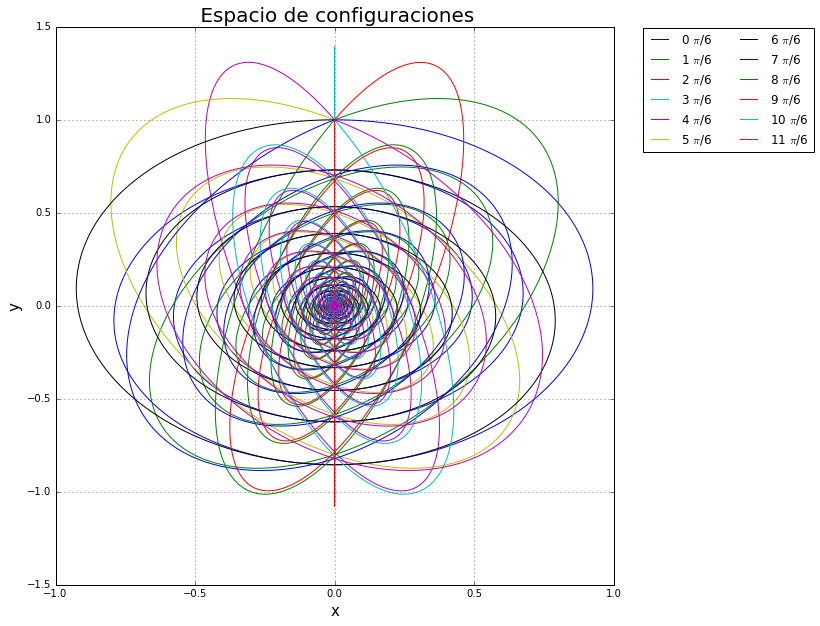

In [6]:
n = range(12)
grafica =subplots(figsize=(10, 10))  #Graficamos el espacio de configuraciones cartesiano
for i in n:
    t = n[i]*pi/6
    tiempo,solucion=rk4_v(oscilador_cart,[0,1,cos(t),sin(t)],[0,100],h=0.01)
    plot(solucion[:,0],solucion[:,1],label = "%s $\pi$/6" %n[i])
    grid(True)
    title(' Espacio de configuraciones',fontsize = 20)
    xlabel('x',fontsize =15), ylabel('y',fontsize =15)
    legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1)
show()





Resolvemos y graficamos ahora el espacio de configuración en polares: Obtenemos en primer lugar la velocidad en coordenadas polares:
$$
\vec v = v_x \hat x+v_y \hat y = v_y(sen\theta \hat r+cos\theta \hat{\theta})+v_x(cos\theta \hat r-sen\theta \hat{\theta})$$

En nuestro caso $\theta=\pi/2$ al inicio, por lo que la expresión se reduce a:

$$
\vec v = v_y( \hat r)+v_x(-\hat{\theta})$$
Por lo tanto
$\omega_i = -v_x/r$ y $v_r = v_y$

In [42]:
def angulo(x,y):
    angulo =zeros(len(x))  
    for i in range(len(x)):
        if x[i]==0:
            if y[i]>0:
                angulo[i] = pi/2
            if y[i]<0:
                angulo[i]=3*pi/2
        elif x[i]>0: 
            if y[i]>0:
                angulo[i] =arctan(y[i]/x[i])
            elif y[i]<0 :
                angulo[i] =arctan(y[i]/x[i])+2*pi
        elif x[i]<0:
                angulo[i] =arctan(y[i]/x[i])+pi
    return angulo

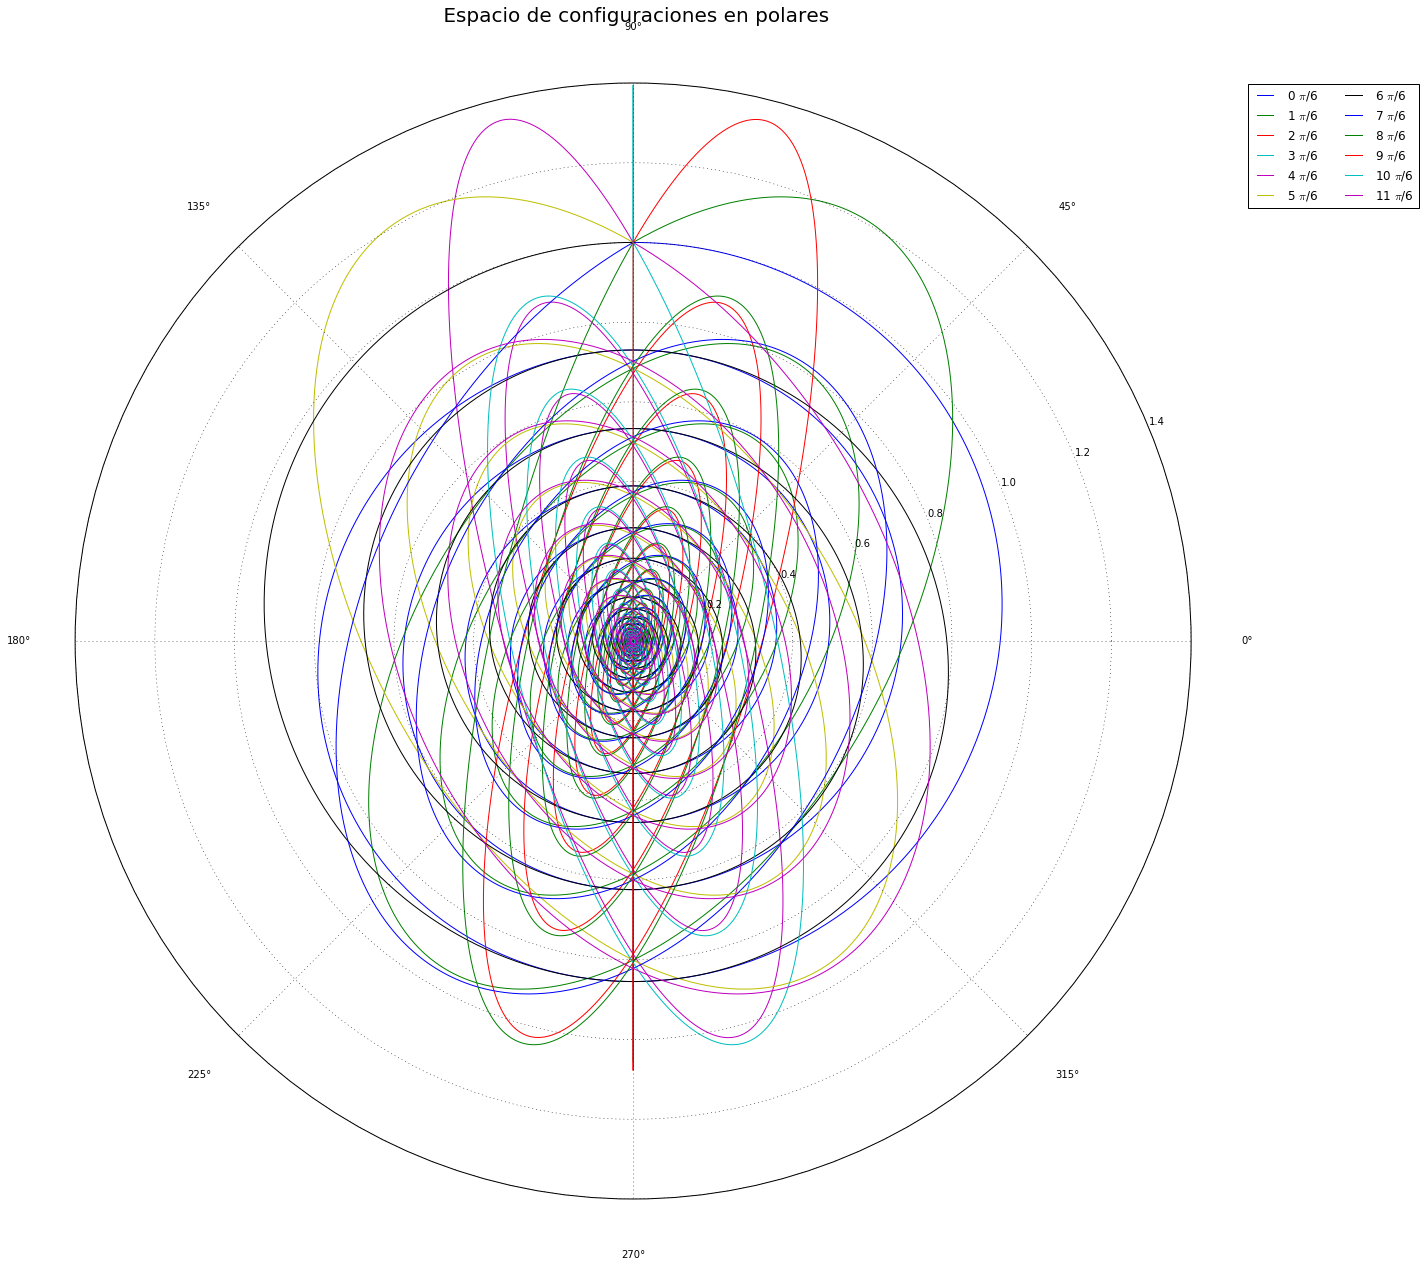

In [44]:
fig = figure(figsize=(20,20))  #Graficamos el espacio de configuraciones polar
ax = fig.add_subplot(111, projection='polar')
for i in n:
    t = n[i]*pi/6  
    tiempo,solucion=rk4_v(oscilador_cart,[0,1,cos(t),sin(t)],[0,100],h=0.01)
    ax.plot(angulo(solucion[:,0],solucion[:,1]),sqrt(solucion[:,0]**2+solucion[:,1]**2),label = "%s $\pi$/6" %n[i])
    grid(True)
    title(' Espacio de configuraciones en polares',fontsize = 20)
    legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1)
show()
    

c) Obtener la energía y detener la simulación cuando esta sea menor al 1% de la energía inicial

La energía del sistema será 
$$
E = \frac{mv^2}{2}+\frac{kr^2}{2}
$$

En coordenadas cartesianas la expresión es:

$$
E = \frac{m(v_{x}^2+v_{y}^2)}{2}+\frac{k(x^2+y^2)}{2}
$$

En coordenadas polares la expresión es:

$$
E = \frac{m(v_{r}^2+r^2\omega^2)}{2}+\frac{kr^2}{2}
$$

Procedemos a programar la energía en cartesianas y en polares.

In [8]:
def energia_carte( r_v, m=1,k = 1): 
    E = m*.5*(r_v[2]**2+r_v[3]**2)+ k*.5*(r_v[0]**2+r_v[1]**2)   
    return E

def energia_pol( r_v, m=1,k = 1): 
    E = m*.5*(r_v[2]**2+r_v[0]**2*r_v[3]**2)+ k*0.5*r_v[0]**2
    return E

Ahora deberemos modificar el método de Runge de manera que si la energía es menor al 1% se detenga la simulación

In [9]:
def rk4_energia(func, x_0, intervalo ,h=0.1):
    tiempo = arange(intervalo[0],intervalo[1]+h,h)
    y = zeros((len(tiempo),len(x_0))) 
    y[0,:] = x_0
    E =zeros(1)
    E0 = energia_carte(y[0,:], m=1,k = 1)
    for i in range(len(tiempo)-1):
        v = y[i,:][2]**2+y[i,:][3]**2
        Ei = energia_carte(y[i,:], m=1,k = 1)
        if  Ei<0.01*E0:  #Damos instrucciones para que se detenga la simulación si la energia es pequeña
            break
        else:
            E = append(E,Ei)
            if v<1:
                k1 = func(y[i,:],tiempo[i])
                k2 = func(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h)
                k3 = func(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h)
                k4 = func(y[i,:]+h*k3,tiempo[i]+h)
                y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
            else:
                    k1 = func(y[i,:],tiempo[i],v)
                    k2 = func(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h,v)
                    k3 = func(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h,v)
                    k4 = func(y[i,:]+h*k3,tiempo[i]+h,v)
                    y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempo, y,E  

Ahora graficamos la evolución de la energía para las condiciones iniciales planteadas en el inciso a):

In [10]:
T = []
S = []
EN =[]
for i in n:
    theta = n[i]*pi/6
    t,solucion,Energia=rk4_energia(oscilador_cart,[0,1,cos(theta),sin(theta)],[0,100],h=0.001)
    tiempos = zeros(len(Energia))
    for j in range(len(Energia)):
        tiempos[j] = t[j]
    T.append(tiempos )   #Las últimas 3 líneas crean arreglos donde guardamos las soluciones y energías para estas condiciones iniciales
    S.append(solucion)
    EN.append(Energia)
    

Para theta=0 $\pi/6$ la energía del último punto fue 0.0100000506521. La energía inicial fue 1.0
Para theta=1 $\pi/6$ la energía del último punto fue 0.0100003810242. La energía inicial fue 1.0
Para theta=2 $\pi/6$ la energía del último punto fue 0.010000505998. La energía inicial fue 1.0
Para theta=3 $\pi/6$ la energía del último punto fue 0.0100015868612. La energía inicial fue 1.0
Para theta=4 $\pi/6$ la energía del último punto fue 0.0100010951665. La energía inicial fue 1.0
Para theta=5 $\pi/6$ la energía del último punto fue 0.0100003810242. La energía inicial fue 1.0
Para theta=6 $\pi/6$ la energía del último punto fue 0.0100000506521. La energía inicial fue 1.0
Para theta=7 $\pi/6$ la energía del último punto fue 0.0100000288172. La energía inicial fue 1.0
Para theta=8 $\pi/6$ la energía del último punto fue 0.0100000406607. La energía inicial fue 1.0
Para theta=9 $\pi/6$ la energía del último punto fue 0.0100009380677. La energía inicial fue 1.0
Para theta=10 $\pi/6$ la energí

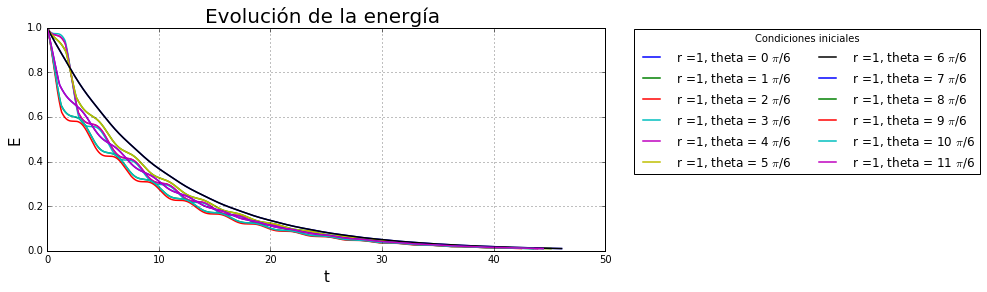

In [11]:
grafica =subplots(figsize=(10, 4))
grid(True)
title('Evolución de la energía ',fontsize = 20)
xlabel('t',fontsize =15), ylabel('E',fontsize =15)
for i in n:
    plot(T[i],EN[i], ls='-',linewidth=1.5, label = " r =1, theta = %s $\pi$/6" %(n[i]))
    print("Para theta=%s $\pi/6$ la energía del último punto fue %s. La energía inicial fue %s"%(n[i],EN[i][-1],EN[i][1]))
legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1, title="Condiciones iniciales")


d) Dibujar las gráficas de momento angular para los casos anteriores

Recordamos que $\vec L = \vec r \times \vec p$  $\implies$ $L_z = xv_y-yv_x$


Por otro lado $\vec{L}= m r \hat r \times (\dot r \hat r+r \omega \hat \theta) \implies L=mr^2 \omega$

Programamos el momento angular

In [12]:
def momento_ang_cart(r_v,m =1 ):
        L =m*(r_v[0]*r_v[3]-r_v[1]*r_v[2]) 
        return L

def momento_ang_pol(r_v,m =1 ):        
        L = m*r_v[0]**2*r_v[3]
        return L

Graficamos ahora el momento angular para las condiciones iniciales de los incisos anteriores

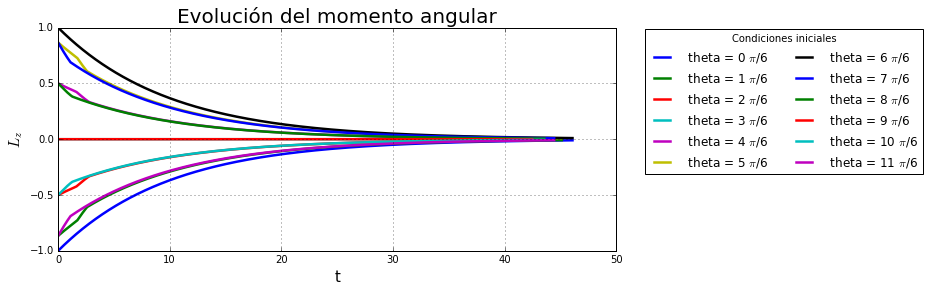

In [13]:
L = []
for i in n:
    l = zeros(len(T[i]))
    for j in range(len(T[i])):
        l[j] =momento_ang_cart(S[i][j],m =1 )
    L.append(l)
    
grafica =subplots(figsize=(10, 4))
grid(True)
title('Evolución del momento angular',fontsize = 20)
xlabel('t',fontsize =15), ylabel('$L_z$',fontsize =15)
for i in n:
    plot(T[i],L[i], ls='-',linewidth=2.5, label = " theta = %s $\pi$/6" %(n[i]))
legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1, title="Condiciones iniciales")



d)Tome de manera arbitraria alguna condición inicial y dibuje el espacio fase (px, x) y ($p_\rho, \rho$)

Hacemos el espacio fase (px,x)  usando el método de Runge para cartesianas

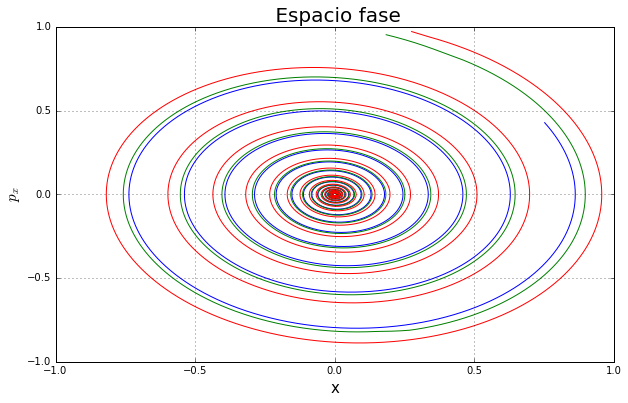

In [20]:
grafica =subplots(figsize=(10, 6))
grid(True)
title(' Espacio fase',fontsize = 20)
xlabel('x',fontsize =15), ylabel('$p_x$',fontsize =15)
for i in range(3):
    x_i =(1-rand())  #Tomamos condiciones iniciales aleatorias
    y_i =(1-rand())
    vx_i =(1-rand())
    vy_i =(1-rand())
    t,solucion=rk4_v(oscilador_cart,[x_i,y_i,vx_i,vy_i],[0,100],h=0.001)
    plot(solucion[:,0],solucion[:,2])




Hacemos el espacio fase ($p_\rho, \rho$)  usando el método de Runge para polares y dibujamos la trayectoria para 3 condiciones aleatorias.

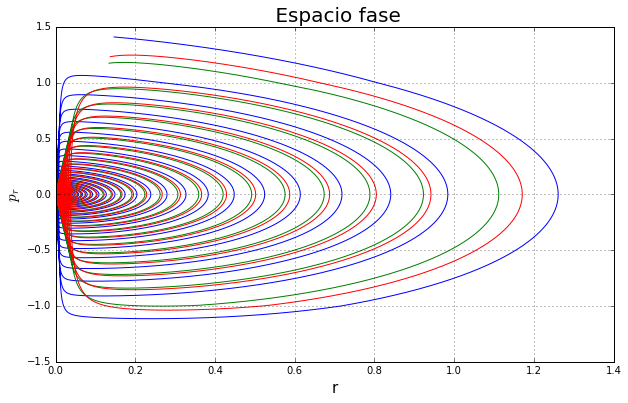

In [19]:
grafica =subplots(figsize=(10, 6))
grid(True)
title(' Espacio fase',fontsize = 20)
xlabel('r',fontsize =15), ylabel('$p_r$',fontsize =15)
for i in range(3):
    r_i =rand()  #Tomamos condiciones iniciales aleatorias
    theta_i =rand()*2*pi
    vr_i =(1-rand())*5
    omega_i =(1-rand())*5
    t,solucion=rk4_v_pol(oscilador_pol,[r_i,theta_i,vr_i,omega_i],[0,100],h=0.001)
    plot(solucion[:,0],solucion[:,2])
    



Este resultado pudo también ser obtenido con cartesianas y una transformación a polares. 
$$
P_r = \frac{\partial H}{\partial \dot r}= \frac{\partial (1/2m(\dot r^2 +r^2\omega^2)+kr)}{\partial \dot r}
$$

# Problema 2

En el problema usaremos el método de Runge Kutta de 4to orden:

In [2]:
def rk4(func, x_0, intervalo, args=0 ,h=0.1):
    tiempo = arange(intervalo[0],intervalo[1]+h,h)
    y = zeros((len(tiempo),len(x_0))) 
    y[0,:] = x_0
    if args==0:
        for i in range(len(tiempo)-1):
            k1 = func(y[i,:],tiempo[i])
            k2 = func(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h)
            k3 = func(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h)
            k4 = func(y[i,:]+h*k3,tiempo[i]+h)
            y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in range(len(tiempo)-1):
            k1 = func(y[i,:],tiempo[i],args)
            k2 = func(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h,args)
            k3 = func(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h,args)
            k4 = func(y[i,:]+h*k3,tiempo[i]+h,args)
            y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempo, y  

 Suponga que se tiene el sistema como en el problema anterior, pero ahora la partícula tiene carga $q > 0$
y en el origen también se encuentra una partícula de carga $q > 0$.

(a) Sin considerar la fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas
de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus
argumentos con alguna simulación).


Si consideramos que el sistema es libre de fricción entonces las fuerzas en el sistema son:
    
1) Fuerza tipo resorte : $\vec F =-k \vec r$

2) Fuerza  de Coulomb:   $\vec F_c =\frac{1}{4 \pi \epsilon_0} \frac{q^2}{r^2} \hat r=\frac{1}{4 \pi \epsilon_0} \frac{q^2}{r^3} \vec r$


Ambas fuerzas son derivables  de un potencial. El potencial al que está sometida la partícula es:
$$
V(r) = \frac{kr^2}{2}-\frac{1}{4 \pi \epsilon_0} \frac{q^2}{r}
$$

Observamos que este es un potencial central. Por lo tanto el potencial efectivo al que está sometida nuestra partícula es:
$$
U(r) =\frac{L^2}{2mr^2} +V(r)=\frac{L^2}{2mr^2}+\frac{kr^2}{2}-\frac{1}{4 \pi \epsilon_0} \frac{q^2}{r}
$$

In [110]:
def potencial(r):
    k = 10
    q= 1
    L2 = 10  #El momento angular se conseva en el sistema y esta constante tiene que ver con las condiciones iniciales
    m =1
    U =L2/(2*m*r**2)+k*r**2/2-q**2/r
    return U

Notar que en la función anterior se han dado valores numéricos a los parámetros del problema. Se acomodaron tal que acentuaran el comportamiento por el cual veremos que existen órbitas cerradas.

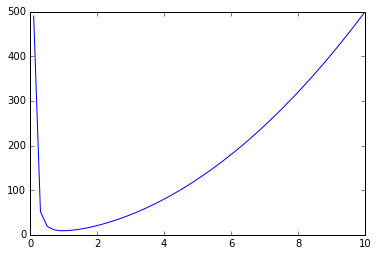

In [111]:
r = linspace(.1,10)
plot(r,potencial(r))

La región dentro del pozo corresponderá a trayectorias acotadas. En particular en el fondo de la gráfica tendremos un punto estable  que por lo tanto tendrá una órbita cerrada. Para encontrar este punto estable necesitamos encontrar el mínimo de la gráfica de arriba.

La derivada del potencial es 
$$
U'(r)= -(\frac{L2}{m r^3}) + \frac{q^2}{r^2} + k r
$$

Ahora debemos de buscar el cero de esa función. Lo hacemos con los métodos para encontrar raíces programados en clase:

In [112]:
def potencial_der(r):
    k = 10
    q= 1
    L2 = 10  #El momento angular se conseva en el sistema y esta constante tiene que ver con las condiciones iniciales
    m =1
    U =-L2/(m*r**3)+k*r+q**2/r**2
    return U

def potencial_dder(r):
    k = 10
    q= 1
    L2 = 10  #El momento angular se conseva en el sistema y esta constante tiene que ver con las condiciones iniciales
    m =1
    U =3*L2/(m*r**4)+k-2*q**2/r**3
    return U

In [132]:
def raiz_bip(func,x_i,x_d,error=1e-12):
    raiz = 0.5*(x_i+x_d) 
    y_i,y_d= func(x_i), func(x_d)
    n= 0
    while abs(raiz-x_d) >= error and abs(y_i-y_d) >= error :
        y_m = func(raiz)
        if y_m==0:
            print ("le atiné!")
            break
        if y_m * y_i < 0:
            x_d = raiz
        else:
            x_i = raiz
        raiz = 0.5*(x_i+x_d)
        y_i , y_d = func(x_i) , func(x_d)
        n+=1
    return raiz  


def mi_newton_1(func,d_func,x_ini,err=1e-12):
    n=0
    while abs(func(x_ini)) >= err:
        raiz = x_ini - func(x_ini)/d_func(x_ini)
        x_ini = raiz
        n += 1
    return raiz

In [133]:
cero = raiz_bip(potencial_der,0.5,1)
cero1 =mi_newton_1(potencial_der,potencial_dder,0.5)
print(cero)
print(cero1)

0.9746878619216659
0.9746878619218852


Obtenemos así aproximaciones para el radio para el cual la órbita será cerrada. Cualitativamente observamos en la gráfica de abajo que los radios se encuentran en la región que esperabamos

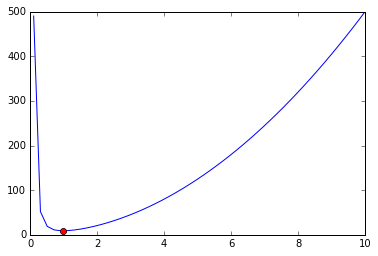

In [134]:
r = linspace(.1,10)
plot(r,potencial(r))
plot(cero,potencial(cero),"o")
plot(cero1,potencial(cero1),"o")

Procedemos a programar la ecuación de movimiento y ver la trayectoria con condición inicial en el radio determinado es efectivamente cerrada. Ya que nuestros métodos  para encontrar raíces no son completamente exacto variaremos ligeramente los ceros encontrados para ver si podemos encontrar una trayectoria cerrada. Ya que ambos métodos coinciden a mucha presición en este caso usaremos sólo el cero entregado por el método de bipartición

In [135]:
def oscilador_cargado(r_v,t): #r_v =[x,y,v_x,v_y]
        k = 10
        q= 1
        L2 = 10  
        m =1
        d_x = r_v[2]
        d_y = r_v[3]
        d_vx = 1/m*(-k*r_v[0]+q**2*r_v[0]/(r_v[0]**2+r_v[1]**2)**(1.5))  #Trabajamos en unidades tales que 4 pi epsilon_o =1
        d_vy = 1/m*(-k*r_v[1]+q**2*r_v[1]/(r_v[0]**2+r_v[1]**2)**1.5)
        return array([d_x,d_y,d_vx,d_vy])

Imponemos condiciones iniciales: Notar que la velocidad angular no es libre: se debe determinar a partir de $\omega_i = \sqrt{L^2}/r^2m$

In [168]:
x_i =zeros(10)
y_i =zeros(10)
v_xi =zeros(10)
v_yi=zeros(10) # la velocidad sobre y debe ser romega


for i in range(10):
    x_i[i] = cero +0.01*i
    v_yi[i] = sqrt(10)/(x_i[i])
    

Resolvemos ahora usando el método de Runge-Kutta. Agregamos unas líneas que comprueban si es que la trayectoria se cruzó con un error de e-5 (la simulación se puede ir haciendo menos precisa y es probable que no llegaremos exactamente al mismo punto de las condiciones iniciales, pero tal vez sí a uno cercano).

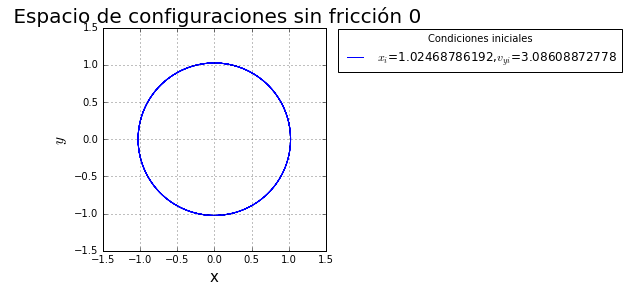

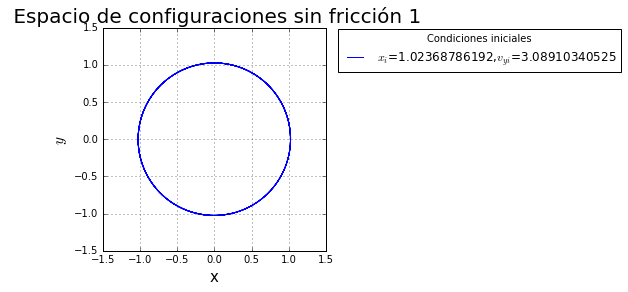

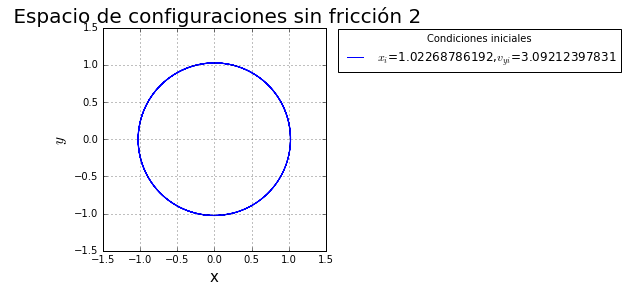

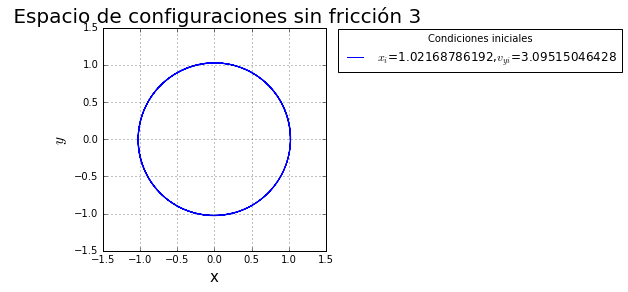

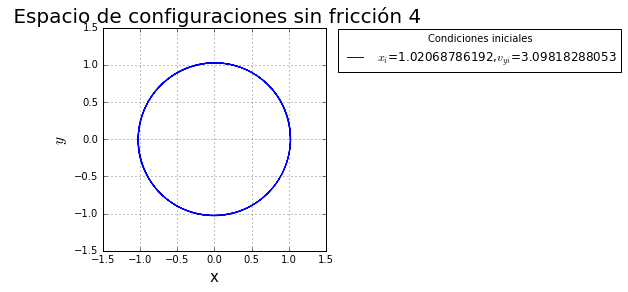

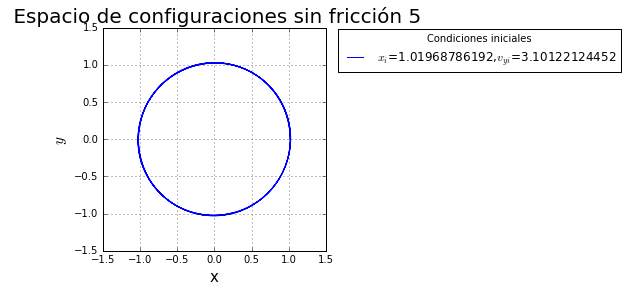

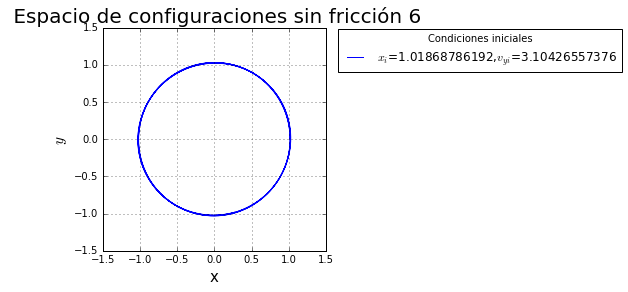

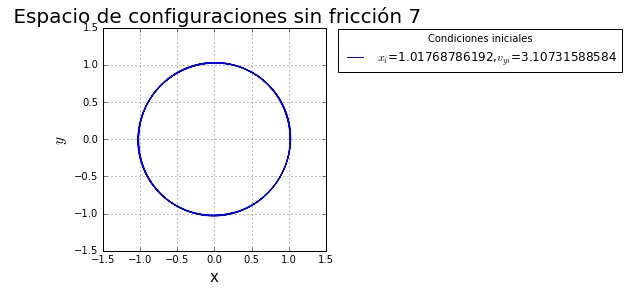

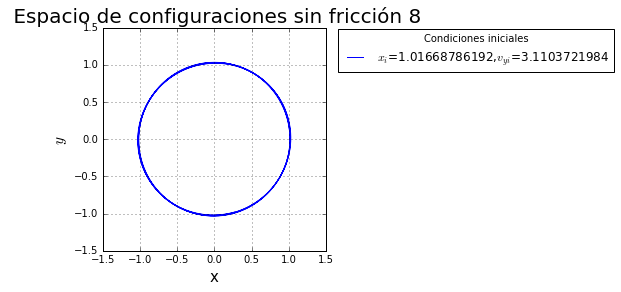

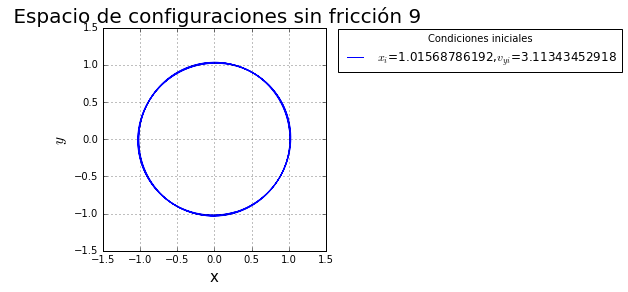

In [204]:

for j in range(10):
    grafica =subplots(figsize=(4, 4))
    tiempos, solucion = rk4(oscilador_cargado,[x_i[j],y_i[j],v_xi[j],v_yi[j]], [0,10],h =0.001)
    plot(solucion[:,0],solucion[:,1],label = "$x_i$=%s,$v_{yi}$=%s" %(x_i[j],v_yi[j]))
    legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1, title="Condiciones iniciales")
    grid(True)

    title(' Espacio de configuraciones sin fricción %s'%j,fontsize = 20)
    xlabel('x',fontsize =15), ylabel('$y$',fontsize =15)

    for i in range(len(tiempos)-1):  
        if solucion[i+1,0]==(solucion[0,0]+1e-2) and solucion[i+1,1]==(solucion[0,1]+1e-2):
            print("Se encontró trayectoria cerrada")
        


Se observa que en primer lugar ninguna de las trayectorias tiene un radio costante (lo cuál debería de suceder para alguna de las trayectorias). El diagrama 5 exhibe una trayectoria cualitativamente cerrada pero que no hizo saltar el mensaje que nos avisaba que se había encontrado una trayectoria cerrada. El error podría venir en parte por la determinación del punto estable (una pequeña variación puede ser la responsable de que la trayectoria no sea circular) o bien  un error en nuestro método de integración. Refiné la busqueda centrándome ahora en el radio usado en el diagrama 5 pero  no obtuve resultados mucho mejores así que los omito.

(b) Considerando fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de
estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos
con alguna simulación).


No se pueden tener órbitas cerradas ya que la fricción a la que está sujeta la partícula implica disipación de energía. El radio no tenderá a cero, pues ahí está la carga y una fuerza repulsiva. La disipación de energía sucede mientras la partícula se mueve, por lo que una de las situaciones posibles es que la partícula encuentre un punto de equilibrio fuera del origen y se mantenga estática ahí.

In [139]:
def oscilador_car_fric(r_v,t,v_mayor=0):   
        k = 10
        m = 1
        gamma = .1
        mu = .2
        k =1
        q =6
        v2=(r_v[2]**2+r_v[3]**2)**0.5
        d_1 = r_v[2]
        d_2 = r_v[3]
        if v_mayor == 0:
            d_v1 = (-k*r_v[0]-gamma*r_v[2]+q**2*r_v[0]/(r_v[0]**2+r_v[1]**2)**1.5)/m
            d_v2 = (-k*r_v[1]-gamma*r_v[3]+q**2*r_v[1]/(r_v[0]**2+r_v[1]**2)**1.5)/m
        else:
            d_v1 = (-k*r_v[0]-mu*v2*r_v[2]+q**2*r_v[0]/(r_v[0]**2+r_v[1]**2)**1.5)/m
            d_v2 = (-k*r_v[1]-mu*v2*r_v[3]+q**2*r_v[1]/(r_v[0]**2+r_v[1]**2)**1.5)/m
        return array([d_1,d_2,d_v1,d_v2])

Usamos ahora el método de Runge-Kutta para resolver la trayectoria, y las mismas condiciones iniciales que en el caso sin fricción.

-2.74053476833 -1.8166561231


(<matplotlib.text.Text at 0x1f1d3228e80>,
 <matplotlib.text.Text at 0x1f1d49f5ba8>)

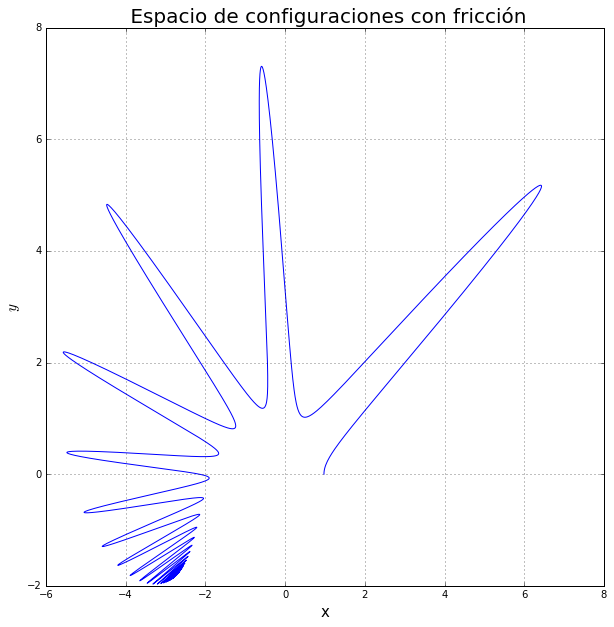

In [159]:
tiempos,sol = rk4(oscilador_car_fric,[x_i,y_i,v_xi,v_yi],[0,100],h=0.01)  
print(sol[-1,0],sol[-1,1])
for i in range(len(tiempos)-1):
    if sol[i+1,0]==sol[0,0] and sol[i+1,1]==sol[0,1]:
        print("Hay trayectoria cerrada")
grafica =subplots(figsize=(10, 10))
plot(sol[:,0],sol[:,1])
grid(True)
title(' Espacio de configuraciones con fricción',fontsize = 20)
xlabel('x',fontsize =15), ylabel('$y$',fontsize =15)

Vemos que la partícula tiende a un punto de equilibrio (-2.74053476833, -1.8166561231). Se podría pensar que si imponemos una posición iniciale cercana a este punto la trayectoria quede acotada en una pequeña región y pueda llegar a ser cerrada. Probemos

(<matplotlib.text.Text at 0x1f1d4bc7048>,
 <matplotlib.text.Text at 0x1f1d4ba8240>)

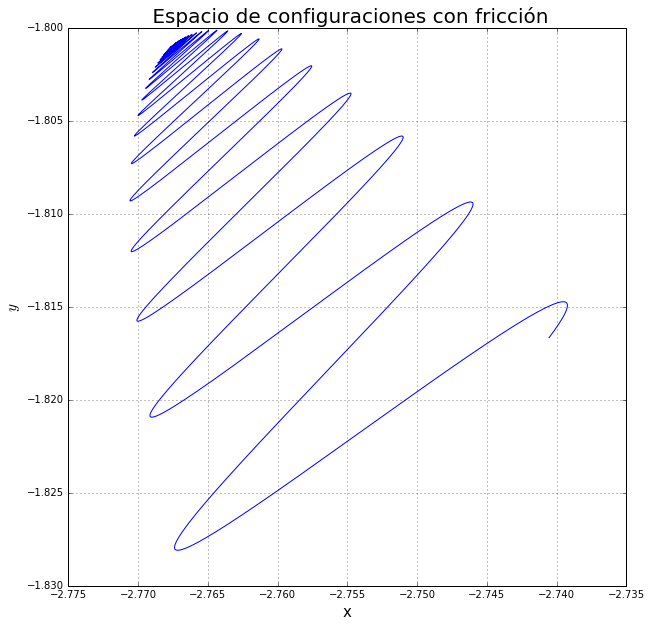

In [160]:
tiempos,sol = rk4(oscilador_car_fric,[-2.74053476833, -1.8166561231,0.01,0.01],[0,100],h=0.01)  

for i in range(len(tiempos)-1):
    if sol[i+1,0]==sol[0,0] and sol[i+1,1]==sol[0,1]:
        print("Hay trayectoria cerrada")
grafica =subplots(figsize=(10, 10))
plot(sol[:,0],sol[:,1])
grid(True)
title(' Espacio de configuraciones con fricción',fontsize = 20)
xlabel('x',fontsize =15), ylabel('$y$',fontsize =15)

Encontramos que la partícula se moverá a otro punto de equilibrio sin describir trayectoria cerrada alguna

NOTA: Excluí de la categoría trayectorias cerradas a las líneas rectas que pasan por el origen. Esas son obtenibles en ambos casos haciendo la velocidad angular igual a cero:

(<matplotlib.text.Text at 0x1f1d5116eb8>,
 <matplotlib.text.Text at 0x1f1d30fc240>)

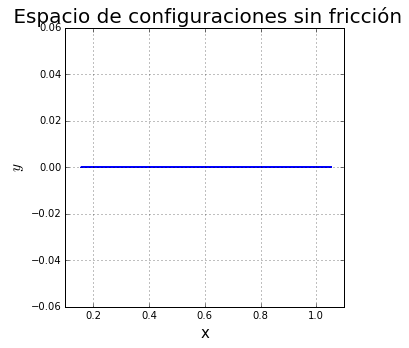

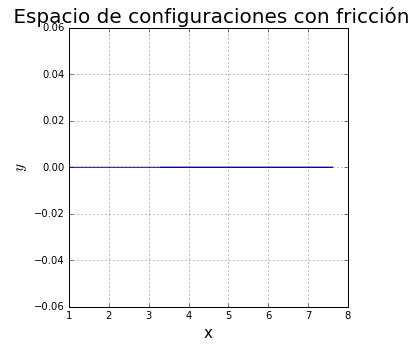

In [192]:
    grafica =subplots(figsize=(5, 5))
    tiempos, solucion = rk4(oscilador_cargado,[1,0,1,0], [0,10],h =0.001)
    plot(solucion[:,0],solucion[:,1])
    grid(True)
    title(' Espacio de configuraciones sin fricción',fontsize = 20)
    xlabel('x',fontsize =15), ylabel('$y$',fontsize =15)
    
    grafica =subplots(figsize=(5, 5))
    tiempos,sol = rk4(oscilador_car_fric,[1,0,1,0],[0,100],h=0.01)  
    plot(sol[:,0],sol[:,1])
    grid(True)
    title(' Espacio de configuraciones con fricción',fontsize = 20)
    xlabel('x',fontsize =15), ylabel('$y$',fontsize =15)

# Problema 3

Se tiene una partícula de masa $m = 1$ en un campo gravitacional $\vec g = −9.8\hat j$ en una caja como se
muestra en la Figura 1 con $L = 10 m$ y $d = 3 m$. Realice los ejercicios con valores de $\alpha = \pi/6$ y
$\alpha = \pi/6$


Realice una simulación con condición inicial tal que la posición inicial es sobre la rampa a un
tercio de la distancia de la pared vertical izquierda y el vértice inferior de la caja, y se dispara
con velocidad $|\vec v| = 1$ hacia la derecha con ángulos sobre la horizontal $\alpha, 2\alpha y 3\alpha$. (Para que la
simulación sea válida, la partícula debe rebotar al menos 20  veces con alguna parte de la caja)

La partícula está sujeta únicamente a la fuerza de la gravedad, y está restringida a mantenerse dentro del dominio que delimita la caja:cuando se encuentre con alguna pared el resultado será que la velocidad de la partícula a lo largo de la normal de la pared con la que chocó cambiará de signo. En primer lugar programamos las ecuaciones de movimiento para la partícula:

In [3]:
def particula(r_v,t,fric=0,g=9.8,m=1): #r_v contiene a las coordenadas x y y y a las velocidades, a es el ángulo de inclinación del plano
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dx = r_v[2]
    dy = r_v[3]
    if fric == 0:
            dvx,dvy = 0,-(g/m)
    else:
            dvx = - fric([r_v[2],r_v[3]])[0]
            dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]
    return array([dx,dy,dvx,dvy])

In [4]:
def fric_v(v,gamma=0.1): #Modelos de fricción que se usarán
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y]) 

def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y = gamma*norm_v*v[1]
    return array([f_x,f_y]) 

Incluimos a continuación un programa que simule el rebote de la partícula en una pared vertical, una en pared horizontal y una con pendiente m que corta en el origen:

In [191]:
def rebote_v(r_v_i,a,mi_dt, lado,friccion=0):  #Rebote con pared vertical x = a, el lado indica si la pelota llega por el lado izq o derecho
    dt_busqueda = mi_dt/2  
    y_izq = r_v_i
    t,sol = rk4(particula,r_v_i,[0,dt_busqueda],friccion)
    y_med = sol[-1,:]
    if lado =="derecho":
        while abs(y_izq[0]) <(a-1e-) :
            if (-y_izq[0]+a)*(-y_med[0]+a)< 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4(particula,reinicio,[0,dt_busqueda],friccion)
            y_izq = reinicio
            y_med = sol[-1,:]
        y_izq = array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])  
    if lado == "izquierdo":
        while abs(y_izq[0]) > (a+1e-2):
            if (y_izq[0]-a)*(y_med[0]-a)< 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4(particula,reinicio,[0,dt_busqueda],friccion)
            y_izq = reinicio
            y_med = sol[-1,:]
        y_izq = array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])  
    return y_izq



def rebote_h(r_v_i,a,mi_dt,friccion=0):  #Rebote con pared horizontal y = a. Suponemos que la pelota llega por abajo
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(particula,r_v_i,[0,dt_busqueda],friccion)
    y_med = sol[-1,:]
    while abs(y_izq[1]) >(1e-7+a):
            if (y_izq[1]-a)*(y_med[1]-a) < 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4(particula,reinicio,[0,dt_busqueda],friccion)
            y_izq = reinicio
            y_med = sol[-1,:]     
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])    
    return y_izq



SyntaxError: invalid token (<ipython-input-191-ba562b07c520>, line 7)

Cuando la partícula rebota en el suelo la transformación de velocidades  es descrita por la matriz $A = \begin{pmatrix} 1 \qquad  0 \\0 \quad -1\end{pmatrix} $. Ahora rotamos el sistema $\alpha$ grados en sentido positivo, de manera que el "suelo" coincida con una recta con ángulo de inclinación $\alpha$. Esta última transformación está descrita por la matriz$R =\begin{pmatrix} cos\alpha \qquad  -sin\alpha \\sin\alpha\qquad cos\alpha\end{pmatrix} $. Por lo tanto la transformación de velocidad que sufre la partícula por chocar con la pared es RA, es decir $\begin{pmatrix} cos\alpha \qquad  sin\alpha \\sin\alpha\qquad -cos\alpha\end{pmatrix} $, es decir $v_x' = cos\alpha v_x+sin\alpha v_y$ y $v_y' = sin\alpha v_x-cos\alpha v_y$



In [122]:
def rebote(m,r_v_i,mi_dt,lado,friccion=0):  #Simular el rebote con una pared con ecuacion mx=y 
    
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(particula,r_v_i,[0,dt_busqueda],friccion)
    y_med = sol[-1,:]
    if lado == "izquierdo":
        while abs(y_izq[1]) < (-1e-3+m*y_izq[0]):
            if (-m*y_izq[0]+y_izq[1])*(-m*y_med[0]+y_med[1]) < 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4(particula,reinicio,[0,dt_busqueda],friccion)
            y_izq = reinicio
            y_med = sol[-1,:]
    if lado == "derecho":
        while abs(m*y_izq[0]) > (1e-3+y_izq[1]):
            if (m*y_izq[0]-y_izq[1])*(m*y_med[0]-y_med[1]) < 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4(particula,reinicio,[0,dt_busqueda])
            y_izq = reinicio
            y_med = sol[-1,:]
            
            
    y_izq = array([y_izq[0],y_izq[1],cos(arctan(m))*y_izq[2]+sin(arctan(m))*y_izq[3],sin(arctan(m))*y_izq[2]-cos(arctan(m))*y_izq[3]]) 
    return y_izq

Construimos ahora la trayectoria de la partícula (posicionamos el origen en el pico inferior de la caja).  Le añadimos un contador  de cuántas veces choca contra cada pared y le ordenamos que la pelota choque al menos 20 veces con alguna pared antes de detenerse.

In [8]:
def acomodar(fuente,recipiente):
    for i in range(len(fuente)):
        recipiente[i].append(fuente[i])
    return recipiente

In [134]:
L = 10
d =  3
    
def trayec(p_ini,alpha,limite,friccion=0,mi_dt = .0001):  #Ponemos en límite cuántas veces queremos que rebote la pelota contra una pared 
    trayectoria = [[],[],[],[]]  #en las primeras entradas guardamos las posiciones y en las últimas las velocidades
    trayectoria=acomodar(p_ini,trayectoria)  #Condiciones iniciales   
    m= tan(alpha )
    n =[0,0,0,0,0] #la entrada 0 es para contar cuántas veces chocó la pelota con la  pared sup, la 1 es para la vertical derecha, la 2 para la inclinada derecha, la 3 para la inclinada izq y la 4 para la vertical derecha
    while (n[2]<=limite and  n[3]<=limite and n[0]<=limite):#Se detiene la simulación cuando la pelota haya chocado las veces que queramos contra alguna pared
         
            t,sol_dt = rk4(particula,[trayectoria[0][-1],trayectoria[1][-1],trayectoria[2][-1],trayectoria[3][-1]],[0,mi_dt],friccion,h=0.01)  
            if (sol_dt[-1,:][1]-(d+L*0.5*m)) > 0:   #Comprobamos si la pelota ha chocado con la pared superior, cuya ecuación es y-(d+L/2*tan(alpha)=0
                punto = rebote_h([trayectoria[0][-1],trayectoria[1][-1],trayectoria[2][-1],trayectoria[3][-1]],d+L*0.5*tan(alpha),mi_dt)
                trayectoria=acomodar(punto,trayectoria)
                n[0]= n[0]+1
            elif (-sol_dt[-1,:][0]+L*0.5) < 0:    #Comprobamos si no choca con la pared derecha de lado d, cuya ecuación es x -L/2 =0
                punto = rebote_v([trayectoria[0][-1],trayectoria[1][-1],trayectoria[2][-1],trayectoria[3][-1]],L*0.5,mi_dt,"izquierdo")
                trayectoria=acomodar(punto,trayectoria)
                n[1]= n[1]+1
            elif (sol_dt[-1,:][0]+L*0.5) < 0:    #Comprobamos si no choca con la pared izquierda de lado d, cuya ecuación es x +L/2 =0
                punto = rebote_v([trayectoria[0][-1],trayectoria[1][-1],trayectoria[2][-1],trayectoria[3][-1]],-L*0.5,mi_dt,"derecho")
                trayectoria=acomodar(punto,trayectoria)
                n[4]= n[4]+1
            elif (sol_dt[-1,:][1]-m*sol_dt[-1,:][0]) < 0:    #Comprobamos si no choca con la pared derecha con inclinación alpha, cuya ecuación es tan(alpha)x  =y
                punto = rebote(m,[trayectoria[0][-1],trayectoria[1][-1],trayectoria[2][-1],trayectoria[3][-1]],mi_dt,"izquierdo")
                trayectoria=acomodar(punto,trayectoria)
                n[2]= n[2]+1
            elif (sol_dt[-1,:][1]+m*sol_dt[-1,:][0]) < 0:    #Comprobamos si no choca con la pared izquierda con inclinación alpha, cuya ecuación es -tan(alpha)x  =y
                punto = rebote(-m,[trayectoria[0][-1],trayectoria[1][-1],trayectoria[2][-1],trayectoria[3][-1]],mi_dt,"derecho")
                trayectoria=acomodar(punto,trayectoria)
                n[3]= n[3]+1
            else:
                trayectoria=acomodar(sol_dt[-1,:],trayectoria)
                
    print("La pelota chocó %s veces con la pared superior, %s con la derecha superior, %s con la derecha inferior,%s con la izquierda inferior y %s con la izquierda superior." %(n[0],n[1],n[2],n[3],n[4]))
    return trayectoria



In [158]:
L = 10
d =  3
    
def trayec(p_ini,alpha,pasos,friccion=0,mi_dt = .01):  #Ponemos en límite cuántas veces queremos que rebote la pelota contra una pared 
    trayectoria = zeros((pasos,4)) 
    trayectoria[0,:]=array(p_ini) #Condiciones iniciales   
    m= tan(alpha )
    n =[0,0,0,0,0] #la entrada 0 es para contar cuántas veces chocó la pelota con la  pared sup, la 1 es para la vertical derecha, la 2 para la inclinada derecha, la 3 para la inclinada izq y la 4 para la vertical derecha
    for i in range(pasos-1):
         
            t,sol_dt = rk4(particula,trayectoria[i,:],[0,mi_dt/2],friccion,h=0.01)  
            if (sol_dt[-1,:][1]-(d+L*0.5*m)) > 0:   #Comprobamos si la pelota ha chocado con la pared superior, cuya ecuación es y-(d+L/2*tan(alpha)=0
                punto = rebote_h(trayectoria[i,:],d+L*0.5*m,mi_dt)
                trayectoria[i+1,:]=punto
                n[0]= n[0]+1
            elif (-sol_dt[-1,:][0]+L*0.5) < 0:    #Comprobamos si no choca con la pared derecha de lado d, cuya ecuación es x -L/2 =0
                punto = rebote_v(trayectoria[i,:],L*0.5,mi_dt,"izquierdo")
                trayectoria[i+1,:]=punto
                n[1]= n[1]+1
            elif (sol_dt[-1,:][0]+L*0.5) < 0:    #Comprobamos si no choca con la pared izquierda de lado d, cuya ecuación es x +L/2 =0
                punto = rebote_v(trayectoria[i,:],-L*0.5,mi_dt,"derecho")
                trayectoria[i+1,:]=punto
                n[4]= n[4]+1
            elif (sol_dt[-1,:][1]-m*sol_dt[-1,:][0]) < 0:    #Comprobamos si no choca con la pared derecha con inclinación alpha, cuya ecuación es tan(alpha)x  =y
                punto = rebote(m,trayectoria[i,:],mi_dt,"izquierdo")
                trayectoria[i+1,:]=punto
                n[2]= n[2]+1
            elif (sol_dt[-1,:][1]+m*sol_dt[-1,:][0]) < 0:    #Comprobamos si no choca con la pared izquierda con inclinación alpha, cuya ecuación es -tan(alpha)x  =y
                punto = rebote(-m,trayectoria[i,:],mi_dt,"derecho")
                trayectoria[i+1,:]=punto
                n[3]= n[3]+1
            else:
                trayectoria[i+1,:]=sol_dt[-1,:]
                
    print("La pelota chocó %s veces con la pared superior, %s con la derecha superior, %s con la derecha inferior,%s con la izquierda inferior y %s con la izquierda superior." %(n[0],n[1],n[2],n[3],n[4]))
    return trayectoria

Programamos las ecuaciones de las paredes

In [159]:
def pared_sup(x,alpha):
    y = [d+L*0.5*tan(alpha)]*len(x)
    return  y

def pared_der_sup(x):
    a =[L*0.5]*len(x)
    return  a

def pared_izq_sup(x):
    a =[-L*0.5]*len(x)
    return  a

def pared_der_inf(x,alpha):
    y =x*tan(alpha)
    return  y

def pared_izq_inf(x,alpha):
    y =-x*tan(alpha)
    return  y

Realizamos ahora  una simulación con condición inicial tal que la partícula está inicialmente sobre la rampa a un
tercio de la distancia de la pared vertical izquierda y el vértice inferior de la caja, y se dispara
con velocidad $|\vec v| = 1$ hacia la derecha con ángulos sobre la horizontal $\alpha, 2\alpha y,3\alpha$. (Para que la
simulación sea válida, la partícula debe rebotar al menos 20 con alguna parte de la caja).


La posición inicial es $x =-L/6=-5/3$ y $y =-Tan(\alpha)x=Tan(\alpha)5/3$

Para $\alpha = \pi/6$ la posición inicial que se pide tiene que cumplir  $x = \pm \frac{L/2}{3} = \pm \frac{L/2}{3} =1.66$. Las velocidades iniciales pedidas serán $\vec{v_i} =\frac{1}{\sqrt{1+Tan^2(i \pi /6)}} (1,Tan(i\pi /6))$ con $i =1,2,3$. 

Para $\alpha = \pi/10$ la posición inicial que se pide tiene que cumplir  $x = \pm \frac{L/2}{3} = \pm \frac{L/2}{3} =1.66$. Las velocidades iniciales pedidas serán $\vec{v_i} =\frac{1}{\sqrt{1+Tan^2(i \pi /10)}} (1,Tan(i\pi /10))$ con $i =1,2,3$. 

In [160]:
def condiciones(alpha):  #crear las velocidades iniciales  para el ángulo alpha
    vi =  []
    for i in range(3):
        angulo =(i+1)*alpha
        if  angulo != pi/2:
            raiz = sqrt(1+tan(angulo)**2)
            v = (1/raiz,tan((i+1)*alpha)/raiz)
        else:
            v = (0,1)
        vi.append(v)
    return vi

Dadas las condiciones iniciales esperamos que la pelota choque primero 20 veces con alguna de las paredes inferiores que con las demás (por eso en el programa trayectoria sólo se tomó como condición que la pelota hubiera chocado menos de 20 veces en las paredes inferiores)

La pelota chocó 0 veces con la pared superior, 0 con la derecha superior, 2 con la derecha inferior,2 con la izquierda inferior y 0 con la izquierda superior.


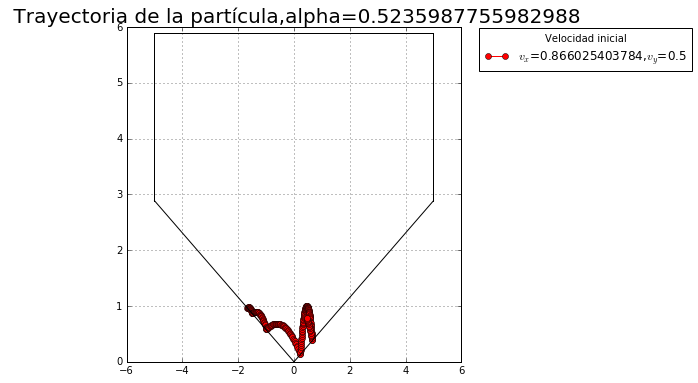

La pelota chocó 0 veces con la pared superior, 0 con la derecha superior, 73 con la derecha inferior,3 con la izquierda inferior y 0 con la izquierda superior.


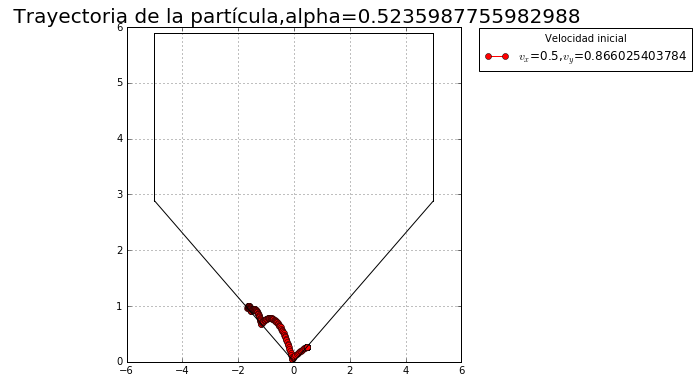

La pelota chocó 0 veces con la pared superior, 0 con la derecha superior, 39 con la derecha inferior,4 con la izquierda inferior y 0 con la izquierda superior.


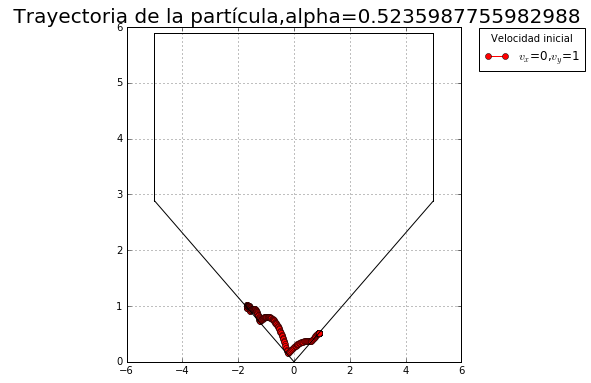

La pelota chocó 0 veces con la pared superior, 0 con la derecha superior, 49 con la derecha inferior,4 con la izquierda inferior y 0 con la izquierda superior.


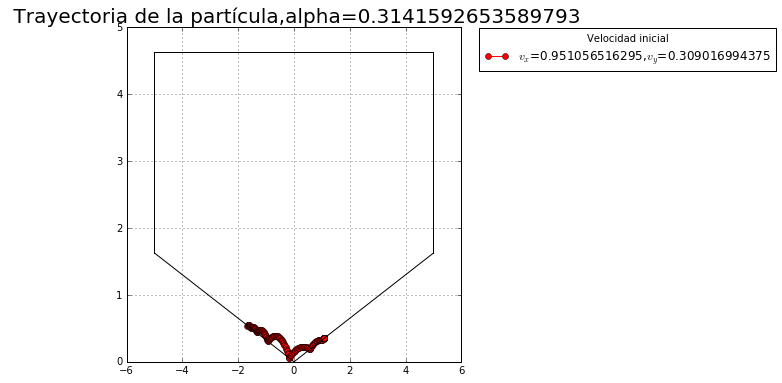

La pelota chocó 0 veces con la pared superior, 0 con la derecha superior, 2 con la derecha inferior,3 con la izquierda inferior y 0 con la izquierda superior.


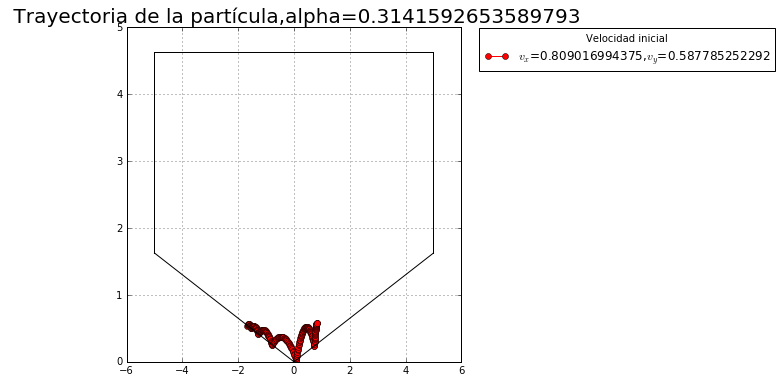

La pelota chocó 0 veces con la pared superior, 0 con la derecha superior, 2 con la derecha inferior,3 con la izquierda inferior y 0 con la izquierda superior.


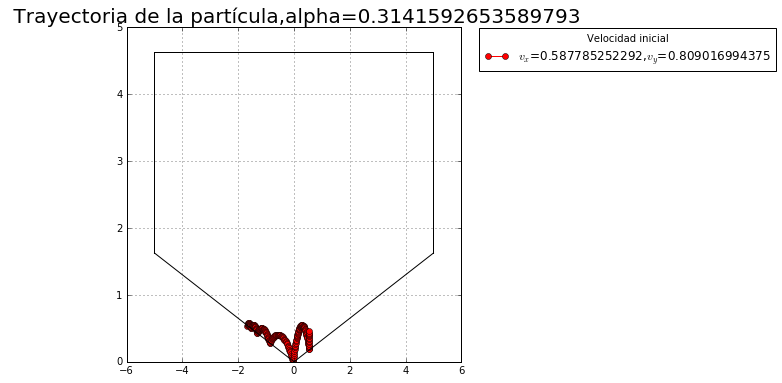

In [188]:
x_1 = [linspace(-5,5),linspace(-5,5)]
x_2 = [linspace(2.88,5.88), linspace(1.62,4.62)]
x_3 = [linspace(0,5),linspace(0,5)]
x_4 = [linspace(-5,0),linspace(-5,0)]
angulos = [pi/6,pi/10]

        
        
for i in range(len(angulos)):
    vi=condiciones(angulos[i])
    for j in range(3):
        grafica =subplots(figsize=(6,6))
        trayectoria1 =trayec([-5/3,tan(angulos[i])*5/3,vi[j][0],vi[j][1]],angulos[i],200)  
        title(' Trayectoria de la partícula,alpha=%s' %angulos[i],fontsize = 20)
        plt.grid(True)
        plot(trayectoria1[:,0],trayectoria1[:,1],"o-",color = 'r', label = "$v_x$=%s,$v_y$=%s" %(vi[j][0],vi[j][1]))
        plot(x_1[i],pared_sup(x_1[i],angulos[i]),linewidth = 1,color = 'k')
        plot(pared_der_sup(x_2[i]),x_2[i],linewidth = 1,color = 'k')
        plot(pared_izq_sup(x_2[i]),x_2[i],linewidth = 1,color = 'k')
        plot(x_3[i],pared_der_inf(x_3[i],angulos[i]),linewidth = 1,color = 'k')
        plot(x_4[i],pared_izq_inf(x_4[i],angulos[i]),linewidth = 1,color = 'k')
        legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1, title="Velocidad inicial")
        show()

Introducimos ahora el modelo de fricción dependiente de la velocidad (fric_v), realizando  simulaciones con las mismas condiciones iniciales que se hicieron anteriormente

La pelota chocó 0 veces con la pared superior, 0 con la derecha superior, 2 con la derecha inferior,2 con la izquierda inferior y 0 con la izquierda superior.


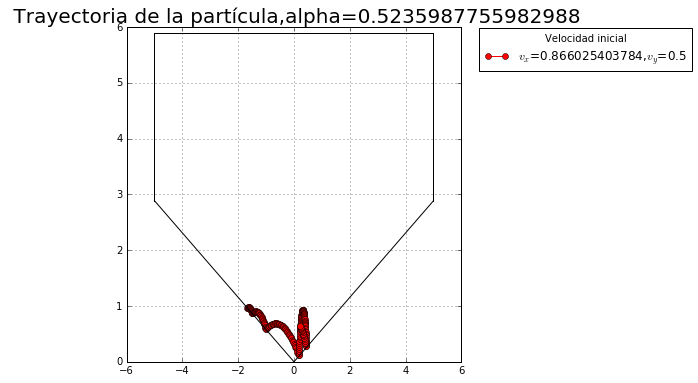

La pelota chocó 0 veces con la pared superior, 0 con la derecha superior, 61 con la derecha inferior,3 con la izquierda inferior y 0 con la izquierda superior.


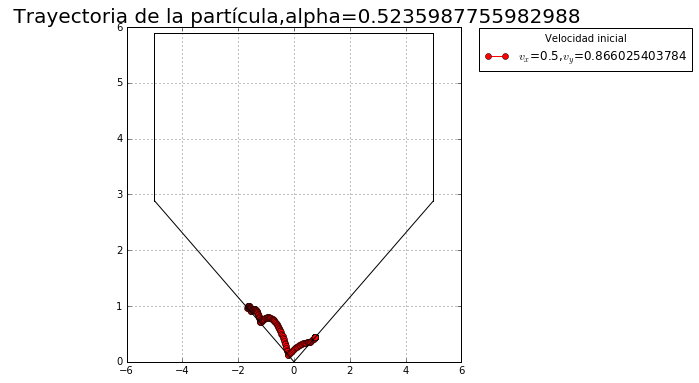

La pelota chocó 0 veces con la pared superior, 0 con la derecha superior, 26 con la derecha inferior,4 con la izquierda inferior y 0 con la izquierda superior.


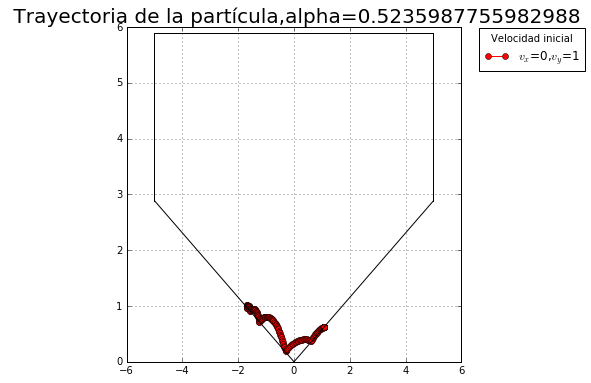

La pelota chocó 0 veces con la pared superior, 0 con la derecha superior, 16 con la derecha inferior,4 con la izquierda inferior y 0 con la izquierda superior.


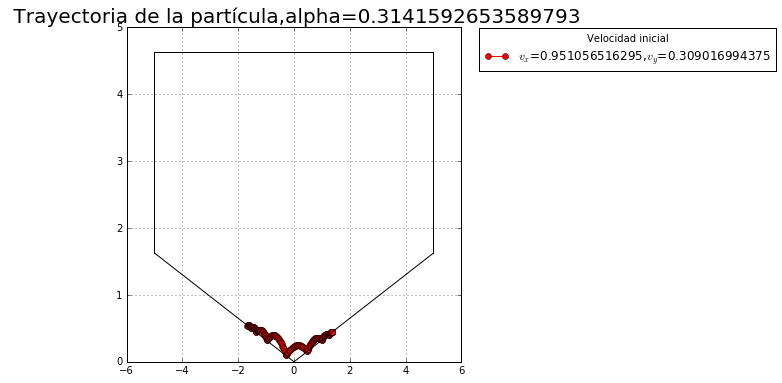

La pelota chocó 0 veces con la pared superior, 0 con la derecha superior, 2 con la derecha inferior,3 con la izquierda inferior y 0 con la izquierda superior.


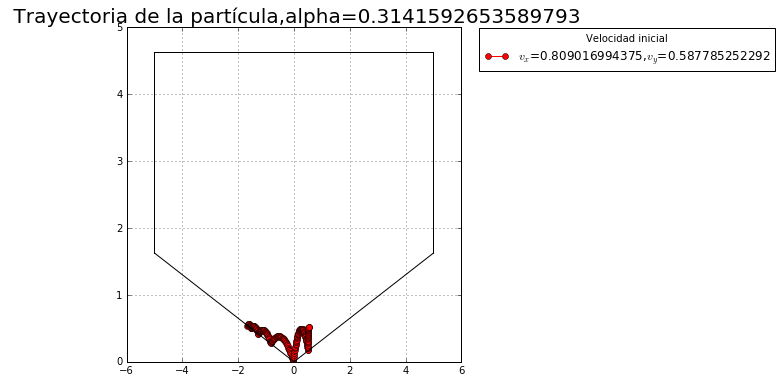

La pelota chocó 0 veces con la pared superior, 0 con la derecha superior, 3 con la derecha inferior,4 con la izquierda inferior y 0 con la izquierda superior.


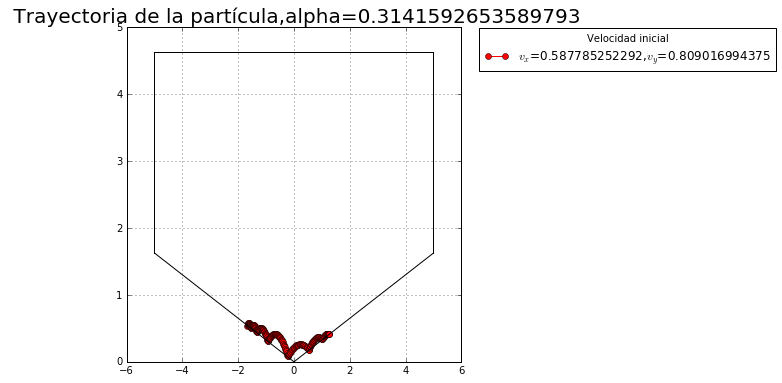

In [192]:
x_1 = [linspace(-5,5),linspace(-5,5)]
x_2 = [linspace(2.88,5.88), linspace(1.62,4.62)]
x_3 = [linspace(0,5),linspace(0,5)]
x_4 = [linspace(-5,0),linspace(-5,0)]
angulos = [pi/6,pi/10]

        
        
for i in range(len(angulos)):
    vi=condiciones(angulos[i])
    for j in range(3):
        grafica =subplots(figsize=(6, 6))
        trayectoria1 =trayec([-5/3,tan(angulos[i])*5/3,vi[j][0],vi[j][1]],angulos[i],200,fric_v)  
        title(' Trayectoria de la partícula,alpha=%s' %angulos[i],fontsize = 20)
        plt.grid(True)
        plot(trayectoria1[:,0],trayectoria1[:,1],"o-",color = 'r', label = "$v_x$=%s,$v_y$=%s" %(vi[j][0],vi[j][1]))
        plot(x_1[i],pared_sup(x_1[i],angulos[i]),linewidth = 1,color = 'k')
        plot(pared_der_sup(x_2[i]),x_2[i],linewidth = 1,color = 'k')
        plot(pared_izq_sup(x_2[i]),x_2[i],linewidth = 1,color = 'k')
        plot(x_3[i],pared_der_inf(x_3[i],angulos[i]),linewidth = 1,color = 'k')
        plot(x_4[i],pared_izq_inf(x_4[i],angulos[i]),linewidth = 1,color = 'k')
        legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1, title="Velocidad inicial")
        show()

Observamos que en general las trayectorias con fricción se concentran mayormente en el el vértice inferior de la caja. Esto es entendible ya que a lo largo de su movimiento la partícula va perdiendo energía y tiende a posiciones  con altura menor y a velocidades cada vez más bajas.

Realizamos ahora las mismas simulaciones, usando esta vez condiciones iniciales tales que $|\vec v| = 25$. Eso se consigue multiplicando las velocidades inicciales de los ejercicios anteriores por 25

In [141]:
def condiciones25(alpha):  #crear las velocidades iniciales  para el ángulo alpha
    vi =  []
    for i in range(3):
        angulo =(i+1)*alpha
        if  angulo != pi/2:
            raiz = sqrt(1+tan(angulo)**2)
            v = (25/raiz,25*tan((i+1)*alpha/raiz))
        else:
            v = (0,25)
        vi.append(v)
    return vi

A continuación se muestran las simulaciones sin fricción

KeyboardInterrupt: 

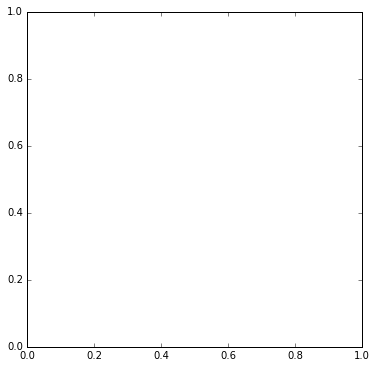

In [193]:
x_1 = [linspace(-5,5),linspace(-5,5)]
x_2 = [linspace(2.88,5.88), linspace(1.62,4.62)]
x_3 = [linspace(0,5),linspace(0,5)]
x_4 = [linspace(-5,0),linspace(-5,0)]
angulos = [pi/6,pi/10]

        
        
for i in range(len(angulos)):
    vi=condiciones25(angulos[i])
    for j in range(3):
        grafica =subplots(figsize=(6,6))
        trayectoria2 =trayec([-5/3,tan(angulos[i])*5/3,vi[j][0],vi[j][1]],angulos[i],250,0,.000001/25)  
        title(' Trayectoria de la partícula,alpha=%s' %angulos[i],fontsize = 20)
        plt.grid(True)
        plot(trayectoria2[:,0],trayectoria2[:,1],"o-",color = 'r', label = "$v_x$=%s,$v_y$=%s" %(vi[j][0],vi[j][1]))
        plot(x_1[i],pared_sup(x_1[i],angulos[i]),linewidth = 1,color = 'k')
        plot(pared_der_sup(x_2[i]),x_2[i],linewidth = 1,color = 'k')
        plot(pared_izq_sup(x_2[i]),x_2[i],linewidth = 1,color = 'k')
        plot(x_3[i],pared_der_inf(x_3[i],angulos[i]),linewidth = 1,color = 'k')
        plot(x_4[i],pared_izq_inf(x_4[i],angulos[i]),linewidth = 1,color = 'k')
        legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1, title="Velocidad inicial")
        show()

Mostramos ahora las simulaciones con fricción

La pelota chocó 2 veces con la pared superior, 2 con la derecha superior, 2 con la derecha inferior,0 con la izquierda inferior y 1 con la izquierda superior.


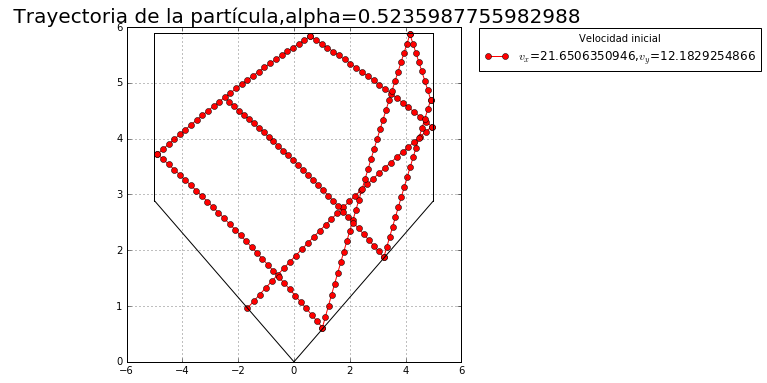

La pelota chocó 1 veces con la pared superior, 1 con la derecha superior, 1 con la derecha inferior,75 con la izquierda inferior y 0 con la izquierda superior.


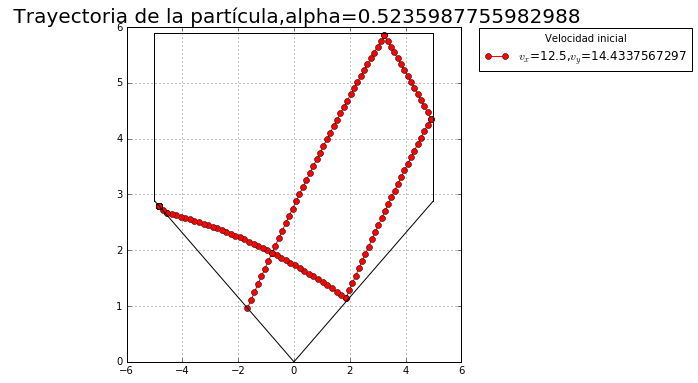

La pelota chocó 5 veces con la pared superior, 0 con la derecha superior, 2 con la derecha inferior,2 con la izquierda inferior y 0 con la izquierda superior.


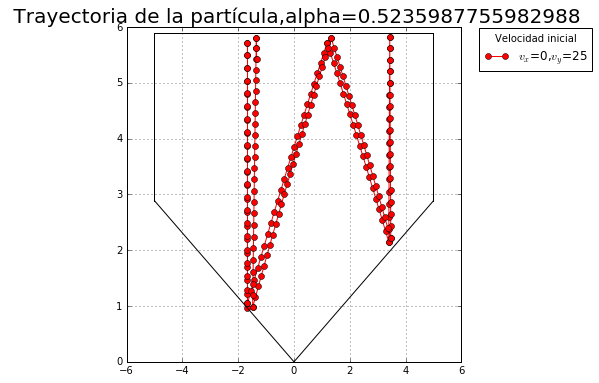

La pelota chocó 1 veces con la pared superior, 2 con la derecha superior, 0 con la derecha inferior,1 con la izquierda inferior y 2 con la izquierda superior.


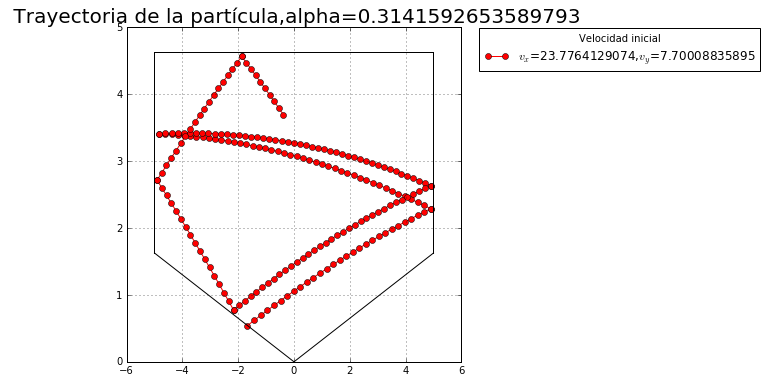

La pelota chocó 3 veces con la pared superior, 2 con la derecha superior, 0 con la derecha inferior,3 con la izquierda inferior y 1 con la izquierda superior.


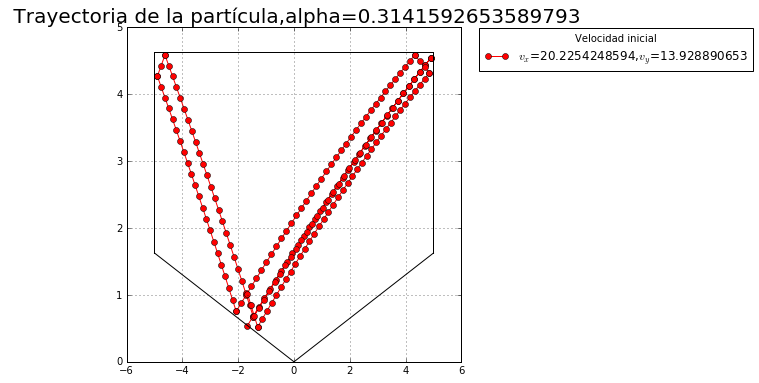

La pelota chocó 3 veces con la pared superior, 2 con la derecha superior, 2 con la derecha inferior,0 con la izquierda inferior y 1 con la izquierda superior.


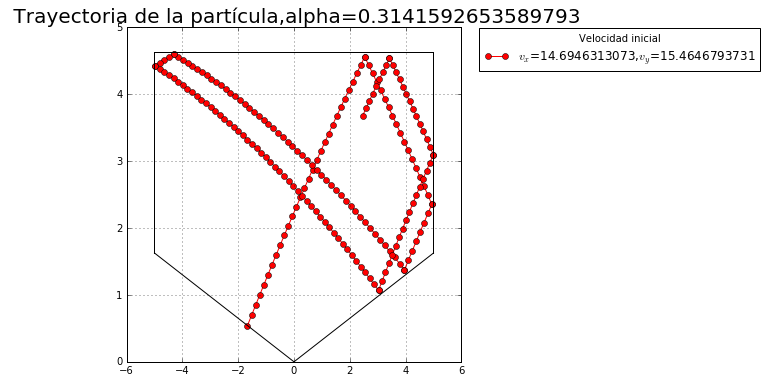

In [185]:
x_1 = [linspace(-5,5),linspace(-5,5)]
x_2 = [linspace(2.88,5.88), linspace(1.62,4.62)]
x_3 = [linspace(0,5),linspace(0,5)]
x_4 = [linspace(-5,0),linspace(-5,0)]
angulos = [pi/6,pi/10]

        
        
for i in range(len(angulos)):
    vi=condiciones25(angulos[i])
    for j in range(3):
        grafica =subplots(figsize=(6, 6))
        trayectoria2 =trayec([-5/3,tan(angulos[i])*5/3,vi[j][0],vi[j][1]],angulos[i],200,fric_v,.01)  
        title(' Trayectoria de la partícula,alpha=%s' %angulos[i],fontsize = 20)
        plt.grid(True)
        plot(trayectoria2[:,0],trayectoria2[:,1],"o-",color = 'r', label = "$v_x$=%s,$v_y$=%s" %(vi[j][0],vi[j][1]))
        plot(x_1[i],pared_sup(x_1[i],angulos[i]),linewidth = 1,color = 'k')
        plot(pared_der_sup(x_2[i]),x_2[i],linewidth = 1,color = 'k')
        plot(pared_izq_sup(x_2[i]),x_2[i],linewidth = 1,color = 'k')
        plot(x_3[i],pared_der_inf(x_3[i],angulos[i]),linewidth = 1,color = 'k')
        plot(x_4[i],pared_izq_inf(x_4[i],angulos[i]),linewidth = 1,color = 'k')
        legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1, title="Velocidad inicial")
        show()

Realizamos ahora las mismas simulaciones, usando esta vez condiciones iniciales tales que $|\vec v| = 60$. Eso se consigue multiplicando las velocidades inicciales que usamos en las primeras simulaciones por 60

In [63]:
def condiciones60(alpha):  #crear las velocidades iniciales  para el ángulo alpha
    vi =  []
    for i in range(3):
        angulo =(i+1)*alpha
        if  angulo != pi/2:
            raiz = sqrt(1+tan(angulo)**2)
            v = (60/raiz,60*tan((i+1)*alpha/raiz))
        else:
            v = (0,60)
        vi.append(v)
    return vi

Simulaciones sin fricción:

La pelota chocó 7 veces con la pared superior, 4 con la derecha superior, 3 con la derecha inferior,4 con la izquierda inferior y 4 con la izquierda superior.


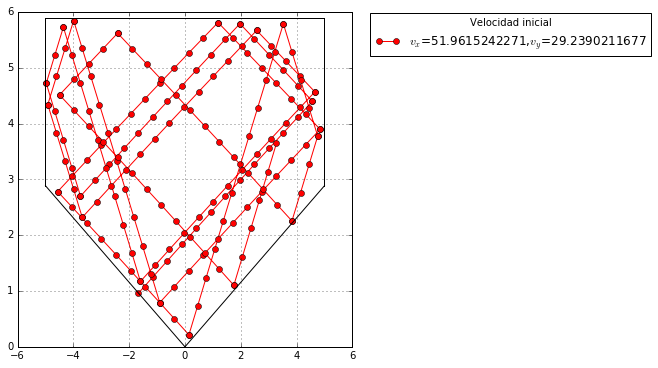

La pelota chocó 6 veces con la pared superior, 2 con la derecha superior, 4 con la derecha inferior,2 con la izquierda inferior y 2 con la izquierda superior.


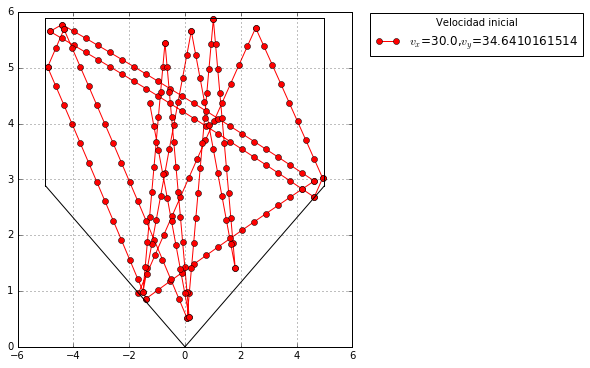

La pelota chocó 12 veces con la pared superior, 0 con la derecha superior, 6 con la derecha inferior,5 con la izquierda inferior y 0 con la izquierda superior.


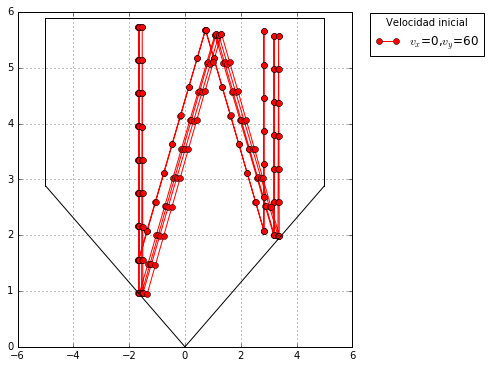

La pelota chocó 8 veces con la pared superior, 4 con la derecha superior, 4 con la derecha inferior,4 con la izquierda inferior y 4 con la izquierda superior.


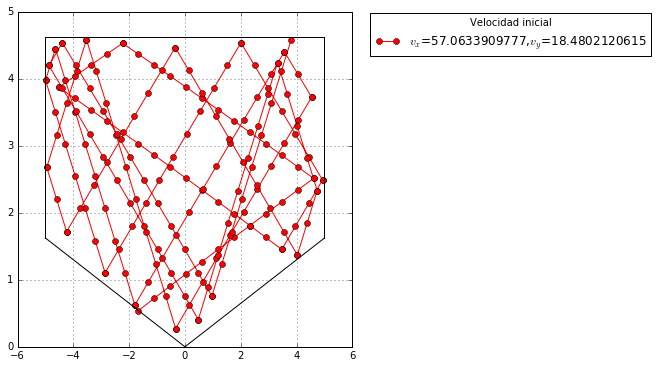

La pelota chocó 9 veces con la pared superior, 4 con la derecha superior, 6 con la derecha inferior,3 con la izquierda inferior y 4 con la izquierda superior.


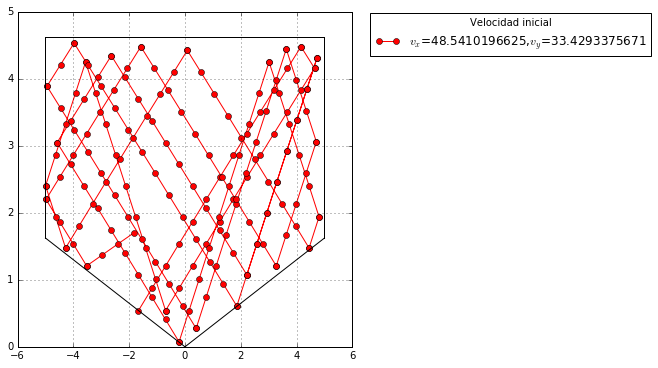

La pelota chocó 9 veces con la pared superior, 3 con la derecha superior, 4 con la derecha inferior,4 con la izquierda inferior y 2 con la izquierda superior.


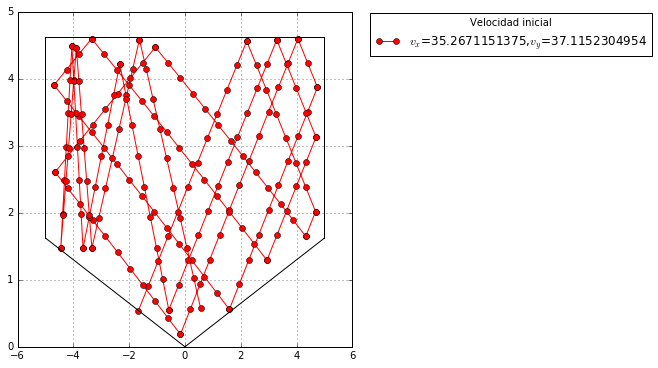

In [184]:
x_1 = [linspace(-5,5),linspace(-5,5)]
x_2 = [linspace(2.88,5.88), linspace(1.62,4.62)]
x_3 = [linspace(0,5),linspace(0,5)]
x_4 = [linspace(-5,0),linspace(-5,0)]
angulos = [pi/6,pi/10]

        
        
for i in range(len(angulos)):
    vi=condiciones60(angulos[i])
    for j in range(3):
        grafica =subplots(figsize=(6, 6))
        trayectoria2 =trayec([-5/3,tan(angulos[i])*5/3,vi[j][0],vi[j][1]],angulos[i],200,0,0.00001)  
        #title(' Trayectoria de la partícula,alpha=%s' %angulos[i],20,fontsize = 20)
        plt.grid(True)
        plot(trayectoria2[:,0],trayectoria2[:,1],"o-",color = 'r', label = "$v_x$=%s,$v_y$=%s" %(vi[j][0],vi[j][1]))
        plot(x_1[i],pared_sup(x_1[i],angulos[i]),linewidth =1,color = 'k')
        plot(pared_der_sup(x_2[i]),x_2[i],linewidth = 1,color = 'k')
        plot(pared_izq_sup(x_2[i]),x_2[i],linewidth =1,color = 'k')
        plot(x_3[i],pared_der_inf(x_3[i],angulos[i]),linewidth = 1,color = 'k')
        plot(x_4[i],pared_izq_inf(x_4[i],angulos[i]),linewidth = 1,color = 'k')
        legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1, title="Velocidad inicial")
        show()

Simulaciones con fricción

La pelota chocó 1 veces con la pared superior, 1 con la derecha superior, 0 con la derecha inferior,0 con la izquierda inferior y 0 con la izquierda superior.


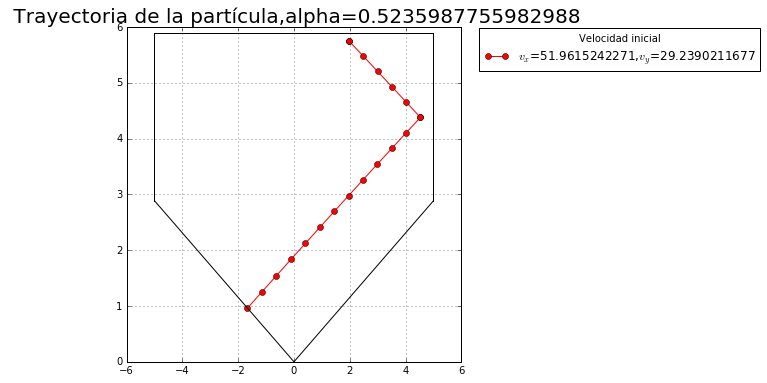

La pelota chocó 1 veces con la pared superior, 0 con la derecha superior, 0 con la derecha inferior,0 con la izquierda inferior y 0 con la izquierda superior.


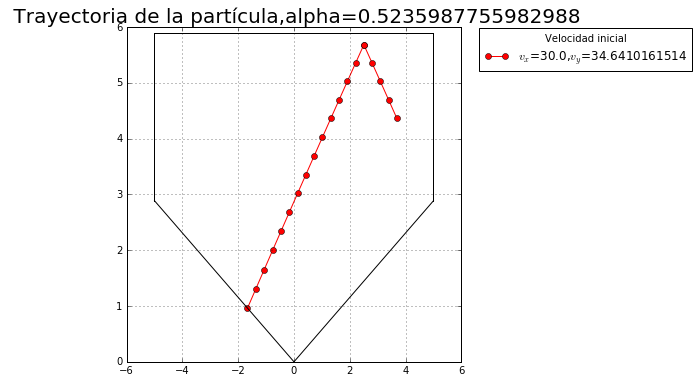

La pelota chocó 1 veces con la pared superior, 0 con la derecha superior, 0 con la derecha inferior,1 con la izquierda inferior y 0 con la izquierda superior.


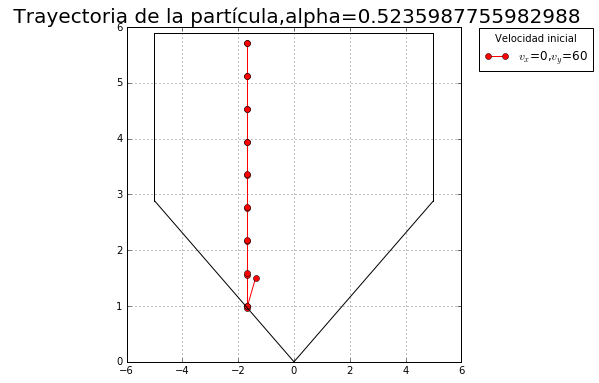

La pelota chocó 0 veces con la pared superior, 1 con la derecha superior, 0 con la derecha inferior,0 con la izquierda inferior y 0 con la izquierda superior.


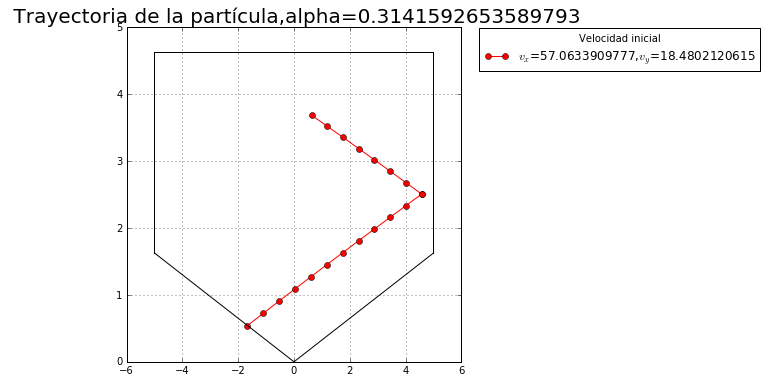

La pelota chocó 1 veces con la pared superior, 1 con la derecha superior, 0 con la derecha inferior,0 con la izquierda inferior y 0 con la izquierda superior.


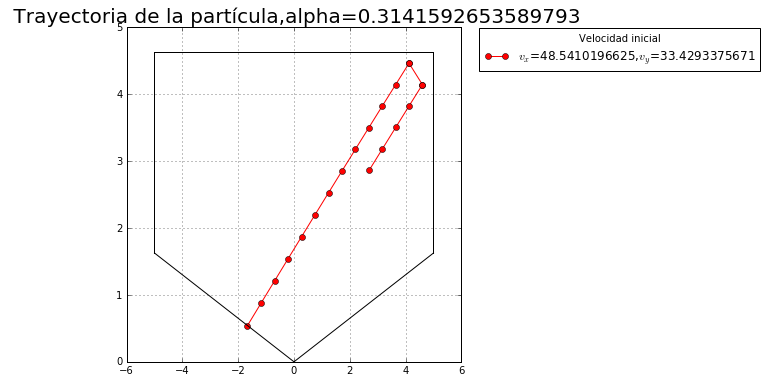

La pelota chocó 1 veces con la pared superior, 0 con la derecha superior, 0 con la derecha inferior,0 con la izquierda inferior y 0 con la izquierda superior.


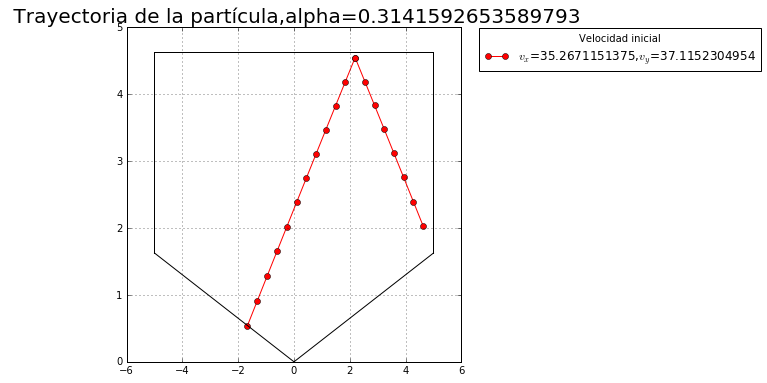

In [157]:
x_1 = [linspace(-5,5),linspace(-5,5)]
x_2 = [linspace(2.88,5.88), linspace(1.62,4.62)]
x_3 = [linspace(0,5),linspace(0,5)]
x_4 = [linspace(-5,0),linspace(-5,0)]
angulos = [pi/6,pi/10]

        
        
for i in range(len(angulos)):
    vi=condiciones60(angulos[i])
    for j in range(3):
        grafica =subplots(figsize=(6, 6))
        trayectoria2 =trayec([-5/3,tan(angulos[i])*5/3,vi[j][0],vi[j][1]],angulos[i],20,fric_v,.00001)  
        title(' Trayectoria de la partícula,alpha=%s' %angulos[i],fontsize = 20)
        plt.grid(True)
        plot(trayectoria2[:,0],trayectoria2[:,1],"o-",color = 'r', label = "$v_x$=%s,$v_y$=%s" %(vi[j][0],vi[j][1]))
        plot(x_1[i],pared_sup(x_1[i],angulos[i]),linewidth = 1,color = 'k')
        plot(pared_der_sup(x_2[i]),x_2[i],linewidth = 1,color = 'k')
        plot(pared_izq_sup(x_2[i]),x_2[i],linewidth = 1,color = 'k')
        plot(x_3[i],pared_der_inf(x_3[i],angulos[i]),linewidth = 1,color = 'k')
        plot(x_4[i],pared_izq_inf(x_4[i],angulos[i]),linewidth = 1,color = 'k')
        legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1, title="Velocidad inicial")
        show()

Conforme se va aumentando la rapidez inicial observamos que la partícula alcanza puntos de arriba de la caja y cubre más área de la misma. Además las trayectorias son más rectas para rapidez inicial mayor, lo que concuerda con el hecho de que la partícula lleva en general más velocidad y su trayectoria no se ve muy curvada por  la gravedad.

A continuación dibujamos el espacio fase $(x,p_x)$ y  $(y,p_y)$ cuando no hay fricción y la partícula se lanza a la derecha a un ángulo $\alpha$ hacia arriba

Elegimos que la partícula tenga una rapidez inicial igual a 60. 

La pelota chocó 0 veces con la pared superior, 0 con la derecha superior, 501 con la derecha inferior,6 con la izquierda inferior y 0 con la izquierda superior.


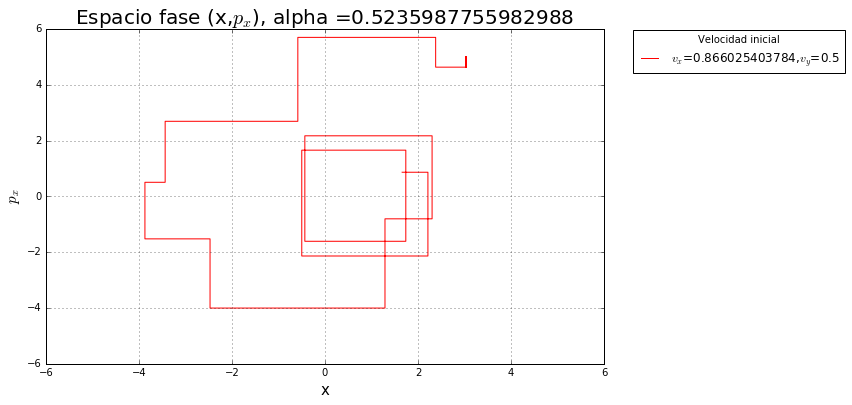

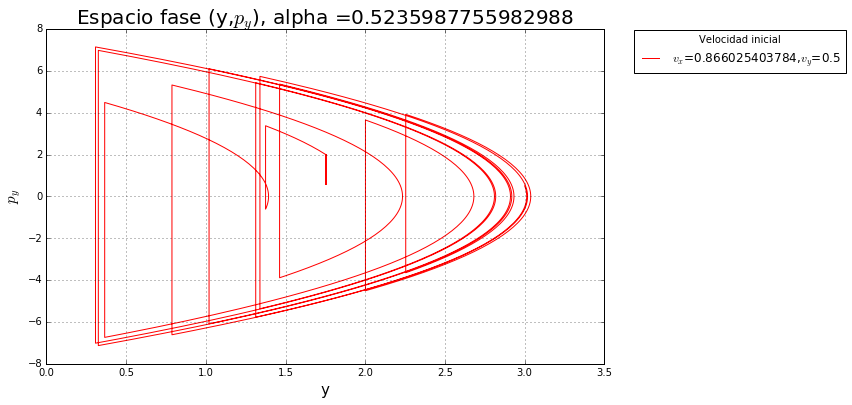

La pelota chocó 0 veces con la pared superior, 6 con la derecha superior, 501 con la derecha inferior,31 con la izquierda inferior y 7 con la izquierda superior.


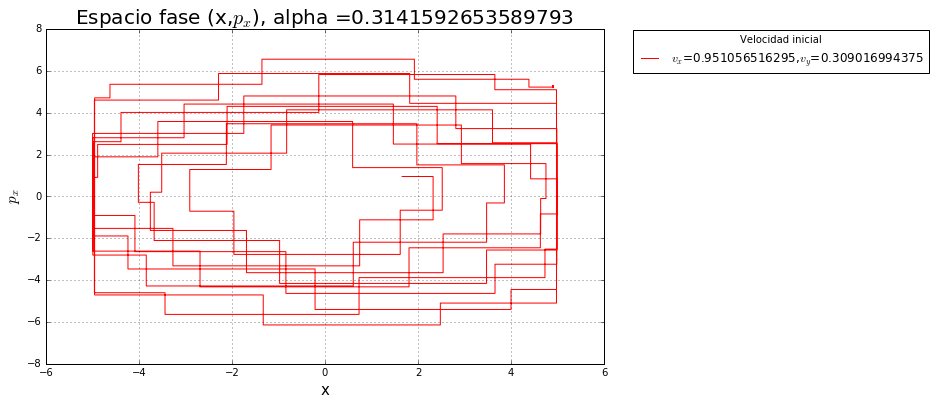

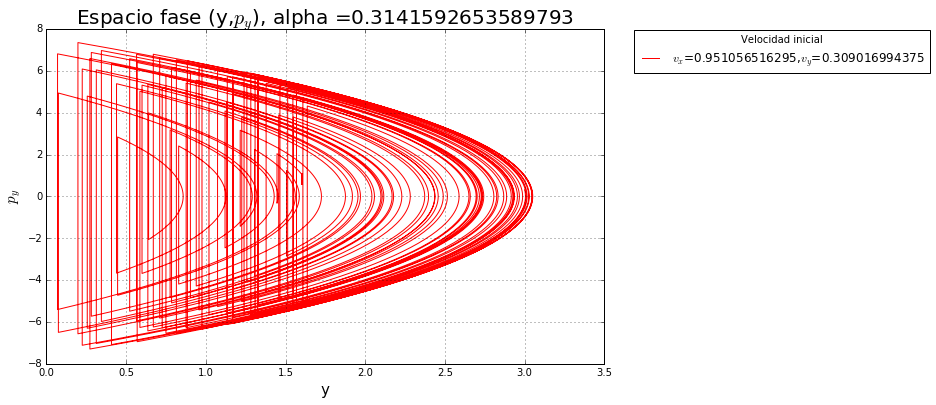

In [19]:
x_1 = [linspace(-5,5),linspace(-5,5)]
x_2 = [linspace(2.88,5.88), linspace(1.62,4.62)]
x_3 = [linspace(0,5),linspace(0,5)]
x_4 = [linspace(-5,0),linspace(-5,0)]
angulos = [pi/6,pi/10]

        
        
for i in range(len(angulos)):
        vi=condiciones(angulos[i])
        grafica =subplots(figsize=(10, 6))
        trayectoria2 =trayec([1.66,3,vi[0][0],vi[0][1]],angulos[i],500,0,.000001)  
        title('Espacio fase (x,$p_x$), alpha =%s'%angulos[i] ,fontsize = 20)
        plt.grid(True)
        plot(trayectoria2[0],trayectoria2[2],color = 'r', label = "$v_x$=%s,$v_y$=%s" %(vi[0][0],vi[0][1]))
        xlabel('x',fontsize =15), ylabel('$p_x$',fontsize =15)
        xlim(-6,6)
        legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1, title="Velocidad inicial")
        
        grafica =subplots(figsize=(10, 6)) 
        title('Espacio fase (y,$p_y$), alpha =%s'%angulos[i] ,fontsize = 20)
        plt.grid(True)
        plot(trayectoria2[1],trayectoria2[3],color = 'r', label = "$v_x$=%s,$v_y$=%s" %(vi[0][0],vi[0][1]))
        xlabel('y',fontsize =15), ylabel('$p_y$',fontsize =15)
        legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1, title="Velocidad inicial")
        show()

# Problema 4

Se tiene una partícula de masa m=1 en una caja circular con radios a y b tales que b=2a

a) Realizar simulación 

Posicionamos el origen en el centro de los dos círculos.Realizaremos el problema en polares:
la fuerza a la que está sujeta la partícula es cero. En el primer inciso del primer problema obtuvimos la expresión de la aceleración en polares. Así, la ecuación de movimiento de la partícula es:

$$
\dot{v_r} =r\omega^2
$$
$$
2v_r\omega+r\dot{ \omega} = 0
$$

$$
\implies \dot{ \omega} = (-2v_r\omega)/r
$$

In [86]:
def particula_2(r_v,t,fric=0,g=9.8,m=1): #r_v contiene a las coordenadas r y theta y a las velocidades
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dr = r_v[2]
    omega = r_v[3]
    if fric == 0:
            dvr,domega = r_v[0]*r_v[3]**2,(-2*r_v[2]*r_v[3])/r_v[0]
    else:
            dvr =r_v[0]*r_v[3]**2- fric([r_v[2],r_v[3]])[0]
            domega = (-2*r_v[2]*r_v[3])/r_v[0] - fric([r_v[2],r_v[3]])[1]
    return array([dr,omega,dvr,domega])

In [90]:
def rebote_circ(r_v_i,a,mi_dt, lado):  #Rebote con pared circular r=a. Lado indica si la partícula llega por afuera o por adentro
    dt_busqueda = mi_dt/2.  
    y_izq = r_v_i
    t,sol = rk4(particula_2,r_v_i,[0,dt_busqueda])
    y_med = sol[-1,:]
    if lado =="adentro":
        while (y_izq[0]) >(a+1e-8) :
            if (y_izq[0]-a)*(y_med[0]-a)< 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4(particula_2,reinicio,[0,dt_busqueda])
            y_izq = reinicio
            y_med = sol[-1,:]
        y_izq = array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])  
    if lado == "afuera":
        while (y_izq[0]) < (a+1e-8):
            if (y_izq[0]-a)*(y_med[0]-a)< 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4(particula_2,reinicio,[0,dt_busqueda])
            y_izq = reinicio
            y_med = sol[-1,:]
        y_izq = array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])  
    return y_izq


Establecemos ahora las restricciones (paredes)

In [88]:
def trayec_circ(p_ini,a,b,pasos,friccion=0,mi_dt = .1):  #Ponemos en límite cuántas veces queremos que rebote la pelota contra una pared 
    trayectoria = zeros((pasos,4))  #en las primeras entradas guardamos las posiciones y en las últimas las velocidades
    trayectoria[0,:]= array(p_ini)
    for i in range(pasos-1):
            t,sol_dt = rk4(particula_2,trayectoria[i,:],[0,mi_dt],0,h=0.01)  
            if (sol_dt[-1,:][0]) >(b):   #Comprobamos si la pelota ha chocado con la pared de afuera, cuya ecuación es r=b
                punto = rebote_circ(trayectoria[i,:],b,mi_dt,"adentro")
                trayectoria[i+1,:]=punto
            elif (sol_dt[-1,:][0]) < (a):    #Comprobamos si no choca con la pared de adentro, cuya ecuación es r = a
                punto = rebote_circ(trayectoria[i,:],a,mi_dt,"afuera")
                trayectoria[i+1,:]=punto
            else:
                trayectoria[i+1,:]=sol_dt[-1,:]
            
    return trayectoria


Por último programamos las ecuaciones de las paredes

In [89]:
def pared_circ(x,b):
    y1 =sqrt(b**2-x**2)
    y2 =-sqrt(b**2-x**2)
    return y1,y2

Realizamos ahora la simulación suponiendo que no hay fricción

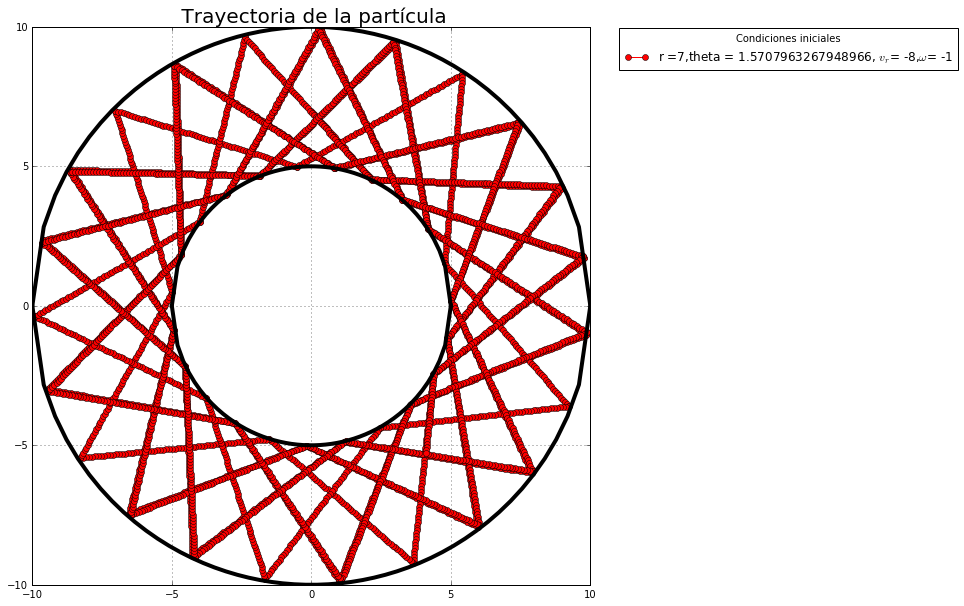

In [89]:
a =5
b = 10
x_1 = linspace(-5,5)
x_2 = linspace(-10,10)
Inicio =  [7,pi/2,-8,-1]

        
grafica =subplots(figsize=(10, 10))
trayectoria1 =trayec_circ(Inicio,a,b,5000,0,.01)  
title(' Trayectoria de la partícula',fontsize = 20)
plt.grid(True)
plot(trayectoria1[:,0]*cos(trayectoria1[:,1]),trayectoria1[:,0]*sin(trayectoria1[:,1]),"o-",color = 'r', label = "r =%s,theta = %s, $v_r $= %s,$\omega$= %s" %(Inicio[0],Inicio[1],Inicio[2],Inicio[3]))
plot(x_1,pared_circ(x_1,a)[0],linewidth = 4,color = 'k')
plot(x_1,pared_circ(x_1,a)[1],linewidth = 4,color = 'k')
plot(x_2,pared_circ(x_2,b)[0],linewidth = 4,color = 'k')
plot(x_2,pared_circ(x_2,b)[1],linewidth = 4,color = 'k')
legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1, title="Condiciones iniciales")
show()

b)¿Existen condiciones iniciales que hagan que la partícula quede encasillada en sólo un sector de
la caja?. De ser así muestre cales son tales condiciones o demuestre porque no se pueden obtener
dicha situación.


Eso dependerá en gran medida del sector que se escoja. Por ejemplo, escogemos la sección del círculo que va de r =6 a r=10 condiciones iniciales tales que el radio esté cercano a 10 y con únicamente velocidad angular bastaran.

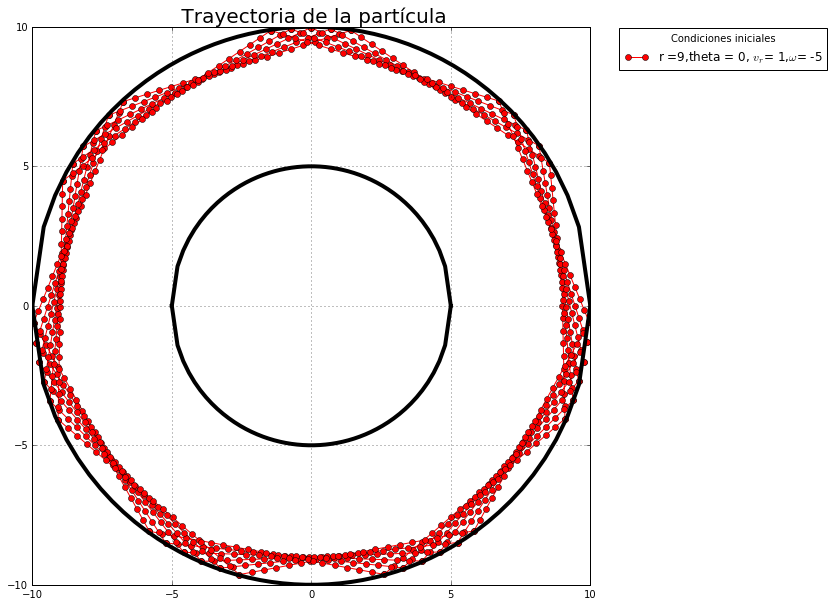

In [90]:
Inicio =  [9,0,1,-5]

        
grafica =subplots(figsize=(10, 10))
trayectoria1 =trayec_circ(Inicio,a,b,800,0,.01)  
title(' Trayectoria de la partícula',fontsize = 20)
plt.grid(True)
plot(trayectoria1[:,0]*cos(trayectoria1[:,1]),trayectoria1[:,0]*sin(trayectoria1[:,1]),"o-",color = 'r', label = "r =%s,theta = %s, $v_r $= %s,$\omega$= %s" %(Inicio[0],Inicio[1],Inicio[2],Inicio[3]))
plot(x_1,pared_circ(x_1,a)[0],linewidth = 4,color = 'k')
plot(x_1,pared_circ(x_1,a)[1],linewidth = 4,color = 'k')
plot(x_2,pared_circ(x_2,b)[0],linewidth = 4,color = 'k')
plot(x_2,pared_circ(x_2,b)[1],linewidth = 4,color = 'k')
legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1, title="Condiciones iniciales")
show()

Si lo que se quiere es que la pelota se quede en alguna rebanada de la caja bastará con darle velocidad radial únicamente ( esto es un poco tramposo porque en realidad la partícula se queda en una línea, pero eso implica que se queda siempre en un sector alrededor de la línea)

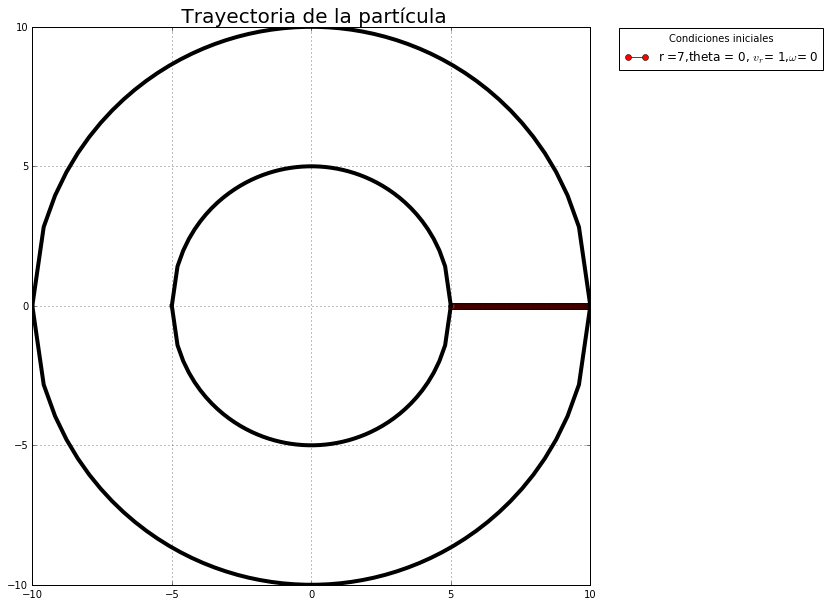

In [91]:
Inicio =  [7,0,1,0]

        
grafica =subplots(figsize=(10, 10))
trayectoria1 =trayec_circ(Inicio,a,b,800,0,.01)  
title(' Trayectoria de la partícula',fontsize = 20)
plt.grid(True)
plot(trayectoria1[:,0]*cos(trayectoria1[:,1]),trayectoria1[:,0]*sin(trayectoria1[:,1]),"o-",color = 'r', label = "r =%s,theta = %s, $v_r $= %s,$\omega$= %s" %(Inicio[0],Inicio[1],Inicio[2],Inicio[3]))
plot(x_1,pared_circ(x_1,a)[0],linewidth = 4,color = 'k')
plot(x_1,pared_circ(x_1,a)[1],linewidth = 4,color = 'k')
plot(x_2,pared_circ(x_2,b)[0],linewidth = 4,color = 'k')
plot(x_2,pared_circ(x_2,b)[1],linewidth = 4,color = 'k')
legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1, title="Condiciones iniciales")
show()

Si se quiere que la pelota barra el sector encontraremos que eso no es posible. Para hacer que la pelota barra el sector se le debería dar una velocidad angular inicial. Ya que no hay fuerzas en la dirección angular y las colisiones con las paredes afectan únicamente a la velocidad radial  obtenemos que el momento angular $L =mr^2 \omega$ se conserva. Observamos a partir de esto que $\omega$ no puede cambiar de signo ni hacerse cero, por lo que, por ejemplo,  si la partícula tiene una velocidad angular positiva entonces esta siempre será positiva y si dejamos correr el tiempo eventualmente la partícula escapará de cualquier sector.Ejemplificamos esto:

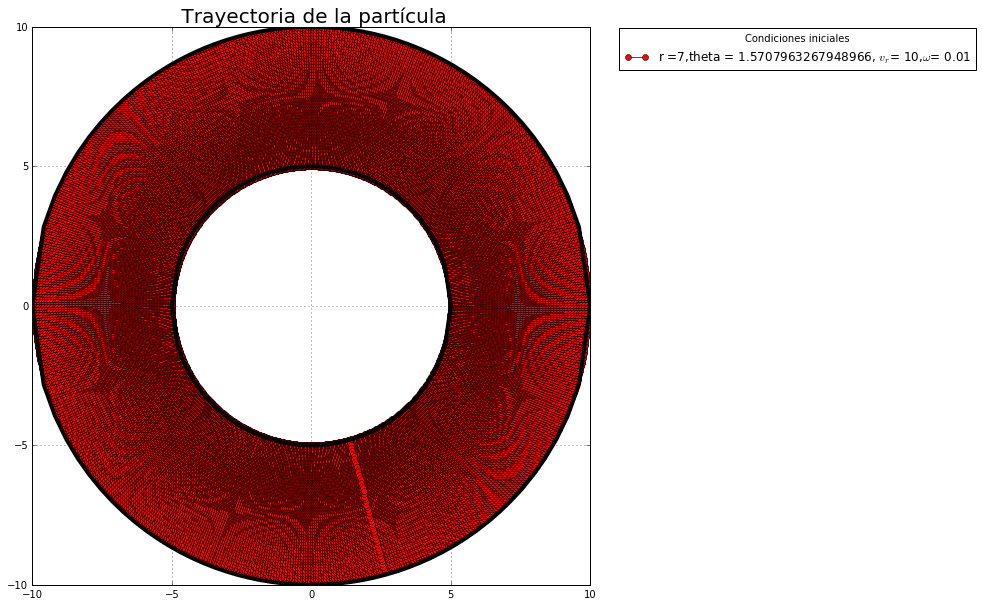

In [94]:
Inicio =  [7,pi/2,10,0.01]  #Añadimos velocidad angular pequeña

        
grafica =subplots(figsize=(10, 10))
trayectoria1 =trayec_circ(Inicio,a,b,100000,0,.01)  
title(' Trayectoria de la partícula',fontsize = 20)
plt.grid(True)
plot(trayectoria1[:,0]*cos(trayectoria1[:,1]),trayectoria1[:,0]*sin(trayectoria1[:,1]),"o-",color = 'r', label = "r =%s,theta = %s, $v_r $= %s,$\omega$= %s" %(Inicio[0],Inicio[1],Inicio[2],Inicio[3]))
plot(x_1,pared_circ(x_1,a)[0],linewidth = 4,color = 'k')
plot(x_1,pared_circ(x_1,a)[1],linewidth = 4,color = 'k')
plot(x_2,pared_circ(x_2,b)[0],linewidth = 4,color = 'k')
plot(x_2,pared_circ(x_2,b)[1],linewidth = 4,color = 'k')
legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1, title="Condiciones iniciales")
show()

 Si ahora se tiene un campo gravitacional uniforme $\vec g = 10\hat{n}$. Que condiciones iniciales se tendrían
que cumplir para que la partícula sólo pueda ocupar la mitad de la dona.


Bastarían condiciones iniciales que posicionaran a la partícula en la parte inferior de la caja y velocidades no muy grandes para que así la energía potencial que se necesitaría para llegar a la parte superior de la caja fuera inalcanzable para la partícula. Para mostrar esto programamos las ecuaciones de movimiento de la partícula. Posicionamos la gravedad en dirección negativa vertical. Teniendo en cuenta que $\hat y = cos \theta \hat{\theta} + sin \theta \hat{r} $, la fuerza de gravedad en coordenadas polares es $\vec F = (-g/m) (cos \theta \hat{\theta} + sin \theta \hat{r})$. Programamos las ecuaciones de movimeitno y añadimos los programas usados en el inciso anterior, cambiando la ecuación de movimiento únicamente.

In [91]:
def particula_3(r_v,t,fric=0,g=10,m=1): #r_v contiene a las coordenadas r y theta y a las velocidades
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dr = r_v[2]
    omega = r_v[3]
    if fric == 0:
            dvr,domega = -(g/m)*sin(r_v[1])+r_v[0]*r_v[3]**2,(-(g/m)*cos(r_v[1])-2*r_v[2]*r_v[3])/r_v[0]
    else:
            dvr = -(g/m)*sin(r_v[1])+r_v[0]*r_v[3]**2- fric([r_v[2],r_v[3]])[0]
            domega = (-(g/m)*cos(r_v[1])-2*r_v[2]*r_v[3])/r_v[0] - fric([r_v[2],r_v[3]])[1]
    return array([dr,omega,dvr,domega])

In [92]:
def rebote_circ(r_v_i,a,mi_dt, lado):  #Rebote con pared circular r=a. Lado indica si la partícula llega por afuera o por adentro
    dt_busqueda = mi_dt/2.  
    y_izq = r_v_i
    t,sol = rk4(particula_3,r_v_i,[0,dt_busqueda])
    y_med = sol[-1,:]
    if lado =="adentro":
        while (y_izq[0]) >(a+1e-8) :
            if (y_izq[0]-a)*(y_med[0]-a)< 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4(particula_3,reinicio,[0,dt_busqueda])
            y_izq = reinicio
            y_med = sol[-1,:]
        y_izq = array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])  
    if lado == "afuera":
        while (y_izq[0]) < (a+1e-8):
            if (y_izq[0]-a)*(y_med[0]-a)< 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4(particula_3,reinicio,[0,dt_busqueda])
            y_izq = reinicio
            y_med = sol[-1,:]
        y_izq = array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])  
    return y_izq

In [93]:
def trayec_circ(p_ini,a,b,pasos,friccion=0,mi_dt = .1):  #Ponemos en límite cuántas veces queremos que rebote la pelota contra una pared 
    trayectoria = zeros((pasos,4))  #en las primeras entradas guardamos las posiciones y en las últimas las velocidades
    trayectoria[0,:]= array(p_ini)
    for i in range(pasos-1):
            t,sol_dt = rk4(particula_3,trayectoria[i,:],[0,mi_dt],0,h=0.01)  
            if (sol_dt[-1,:][0]) >(b):   #Comprobamos si la pelota ha chocado con la pared de afuera, cuya ecuación es r=b
                punto = rebote_circ(trayectoria[i,:],b,mi_dt,"adentro")
                trayectoria[i+1,:]=punto
            elif (sol_dt[-1,:][0]) < (a):    #Comprobamos si no choca con la pared de adentro, cuya ecuación es r = a
                punto = rebote_circ(trayectoria[i,:],a,mi_dt,"afuera")
                trayectoria[i+1,:]=punto
            else:
                trayectoria[i+1,:]=sol_dt[-1,:]
            
    return trayectoria

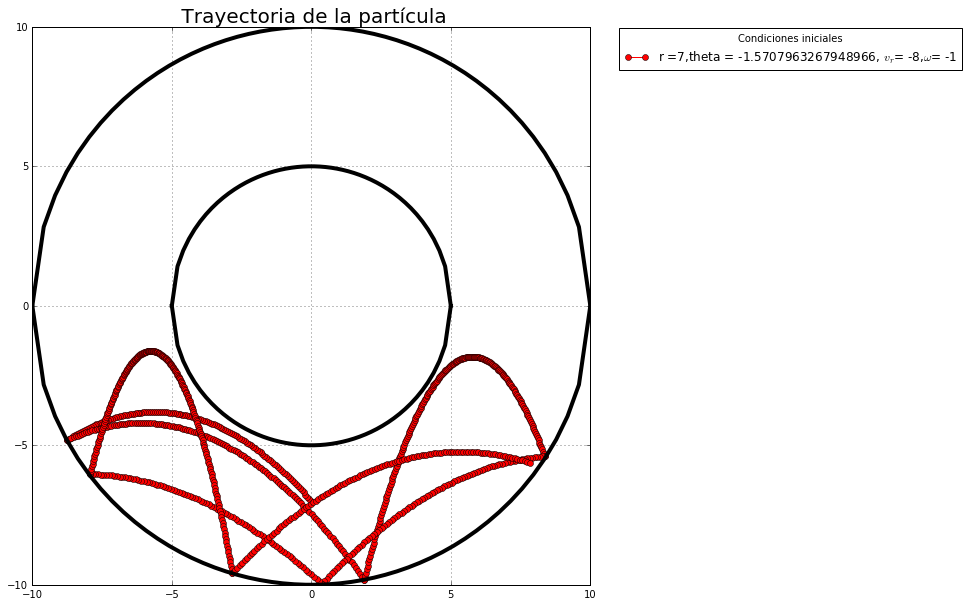

In [179]:
a =5
b = 10
x_1 = linspace(-5,5)
x_2 = linspace(-10,10)
Inicio =  [7,-pi/2,-8,-1]

        
grafica =subplots(figsize=(10, 10))
trayectoria1 =trayec_circ(Inicio,a,b,1000,0,.01)  
title(' Trayectoria de la partícula',fontsize = 20)
plt.grid(True)
plot(trayectoria1[:,0]*cos(trayectoria1[:,1]),trayectoria1[:,0]*sin(trayectoria1[:,1]),"o-",color = 'r', label = "r =%s,theta = %s, $v_r $= %s,$\omega$= %s" %(Inicio[0],Inicio[1],Inicio[2],Inicio[3]))
plot(x_1,pared_circ(x_1,a)[0],linewidth = 4,color = 'k')
plot(x_1,pared_circ(x_1,a)[1],linewidth = 4,color = 'k')
plot(x_2,pared_circ(x_2,b)[0],linewidth = 4,color = 'k')
plot(x_2,pared_circ(x_2,b)[1],linewidth = 4,color = 'k')
legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1, title="Condiciones iniciales")
show()

# Punto Extra

Se realiza a continuación una animación para la caja del problema 3, con $| \vec v | = 25$. Se usa $\alpha = \pi/6$, la velocidad inicial $\vec v =(0,25)$

In [96]:
from JSAnimation import IPython_display
from matplotlib import animation

ImportError: No module named 'JSAnimation'

La pelota chocó 19 veces con la pared superior, 1 con la derecha superior, 21 con la derecha inferior,16 con la izquierda inferior y 3 con la izquierda superior.


NameError: name 'animation' is not defined

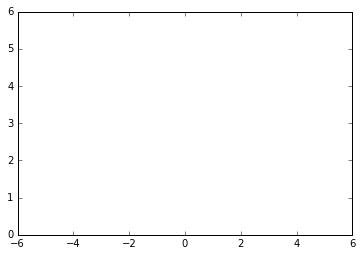

In [97]:
sol =trayec([1.66,3,0,25],pi/6,20,fric_v,.01)   
x_1 = np.linspace(-5, 5, 1000)
x_2 = np.linspace(2.88,5.88, 1000)
x_3 = np.linspace(0,5, 1000)
x_4 = np.linspace(-5,0, 1000)

figura = figure() #Crea la figura
ejes = axes(xlim=(-6,6),ylim=(0,6))


punto, = ejes.plot([],[],'o')
def init():
    punto.set_data([],[])
    return  punto,  #Inicializa variables

def el_movimiento(i):
    x,y = sol[:][0],sol[:][1]
    punto.set_data(x[i],y[i])
    paredsup =ejes.plot(x_1,pared_sup(x_1,pi/6),lw = 4,color = 'k')
    paredisup =ejes.plot(pared_izq_sup(x_2),x_2,lw = 4,color = 'k')
    pareddsup =ejes.plot(pared_der_sup(x_2),x_2,lw = 4,color = 'k')
    parediinf =ejes.plot(x_3,pared_der_inf(x_3,pi/6),lw = 4,color = 'k')
    pareddinf =ejes.plot(x_4,pared_izq_inf(x_4,pi/6),lw = 4,color = 'k')
    return trayectoria,punto
    
animation.FuncAnimation(figura,el_movimiento, init_func = init , frames =100,interval=10)







Se realiza ahora la animación para el problema 4, pensando que hay gravedad. Usamos las condiciones iniciales r==7,$\theta=-\pi/2$,$v_r=-2$,$\omega=-1$


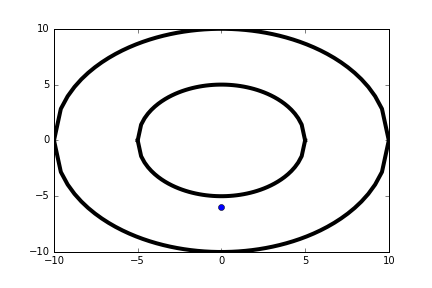
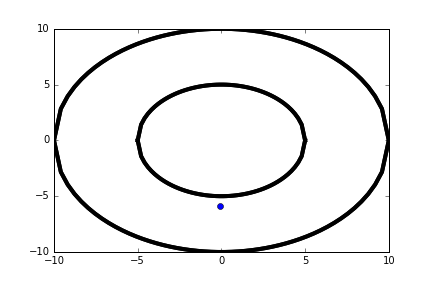
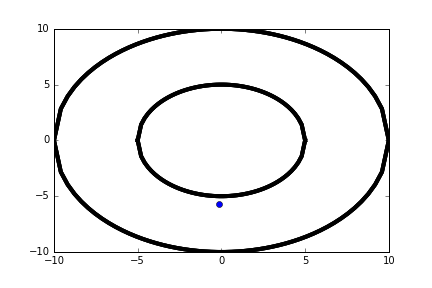
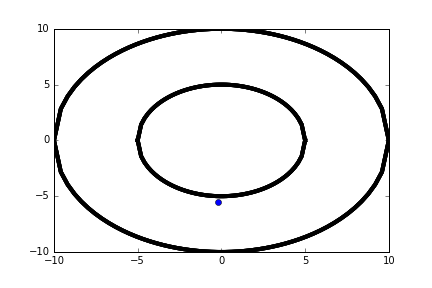
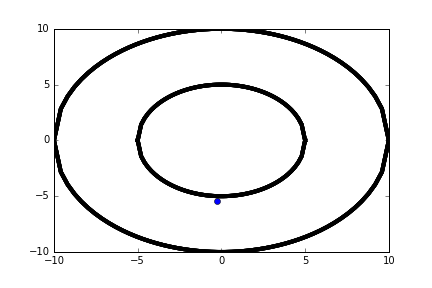
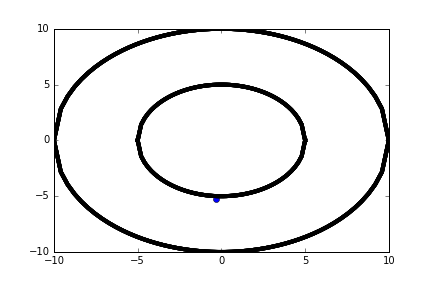
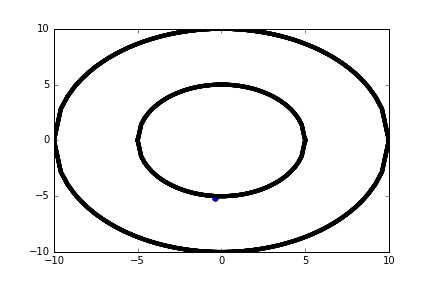
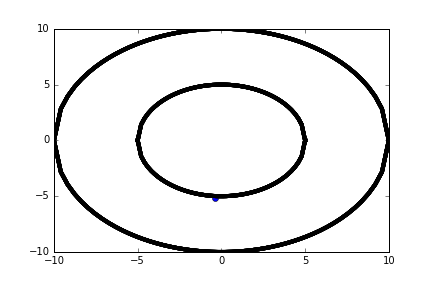
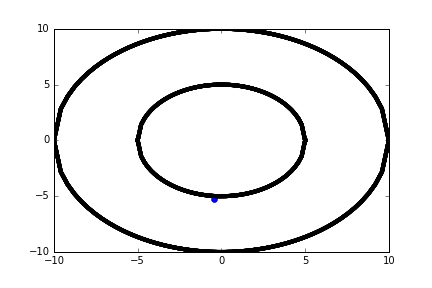
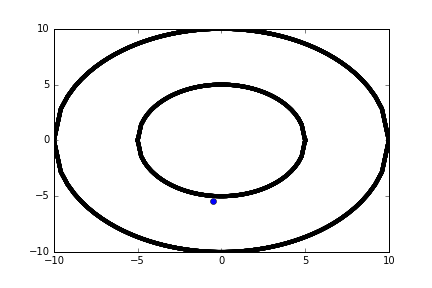
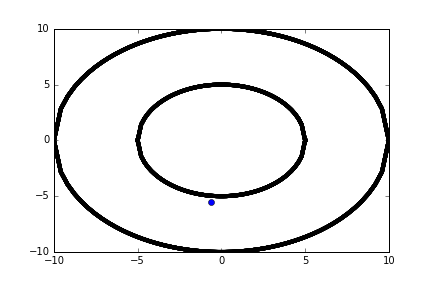
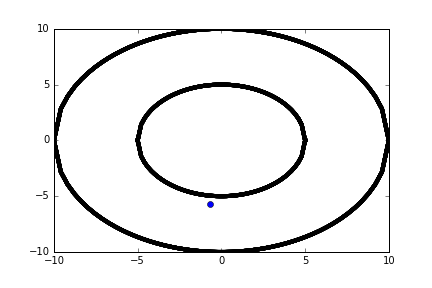
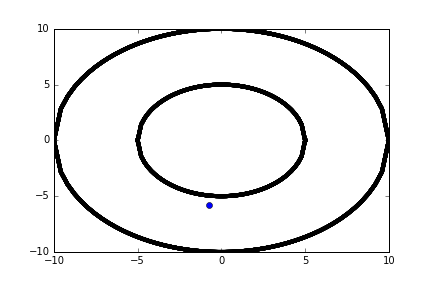
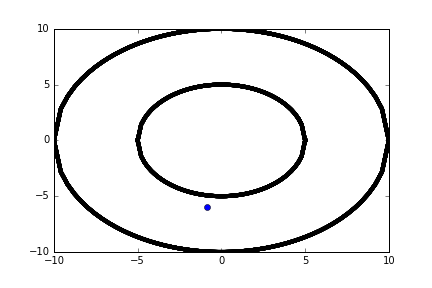
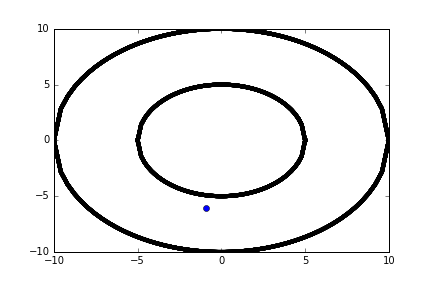
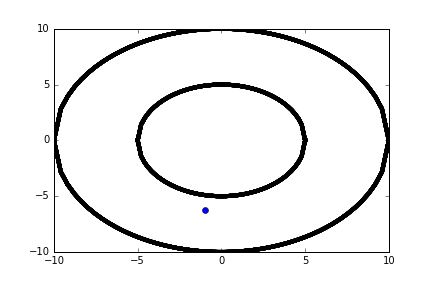
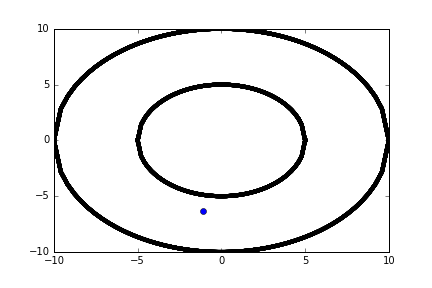
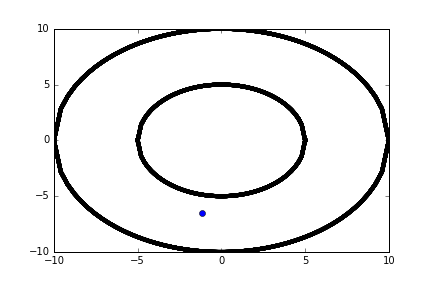
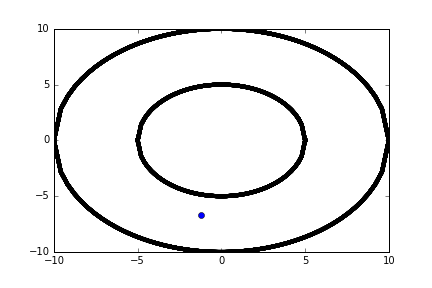
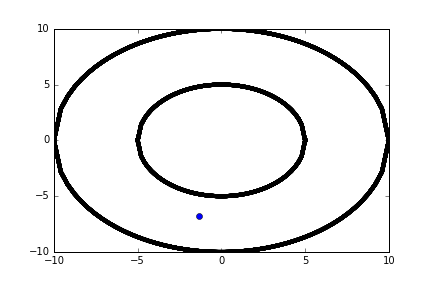
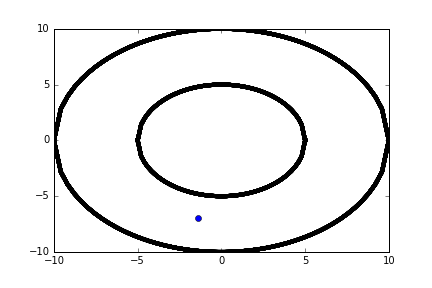
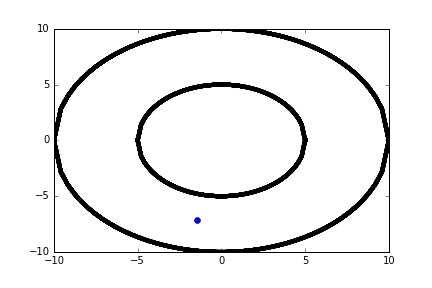
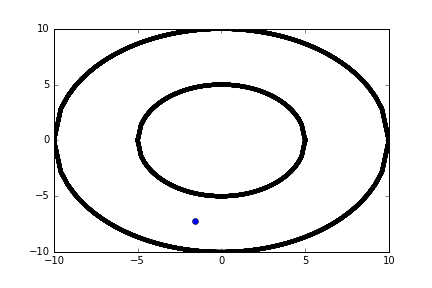
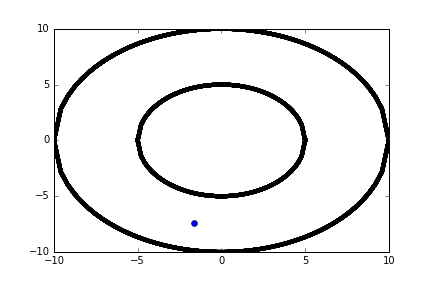
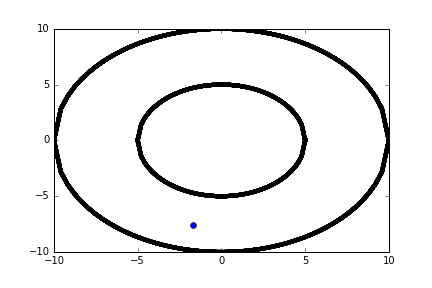
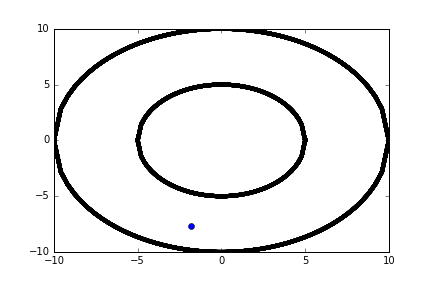
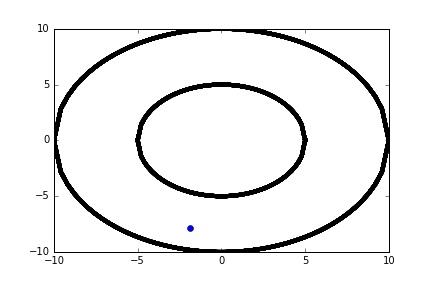
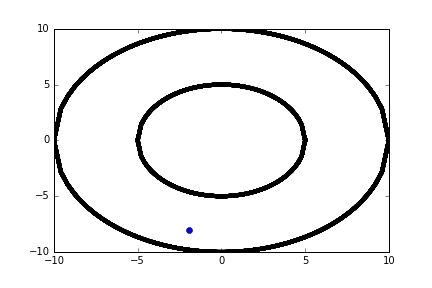
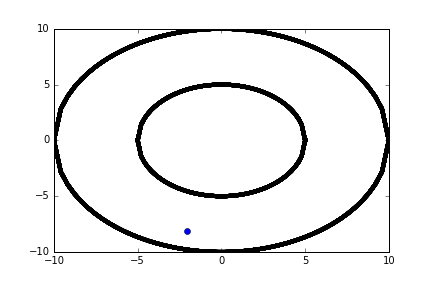
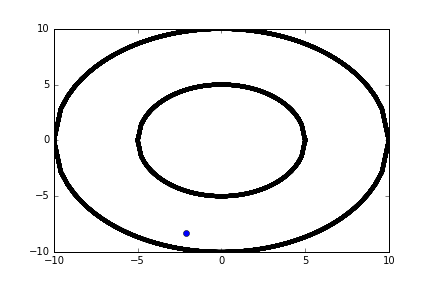
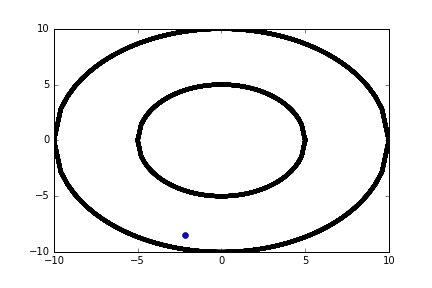
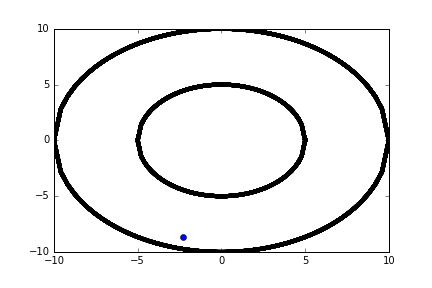
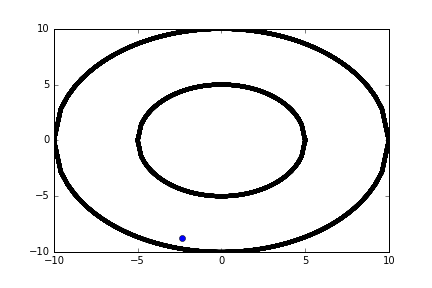
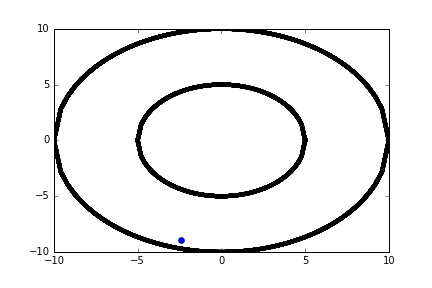
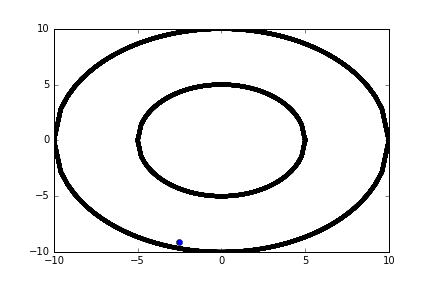
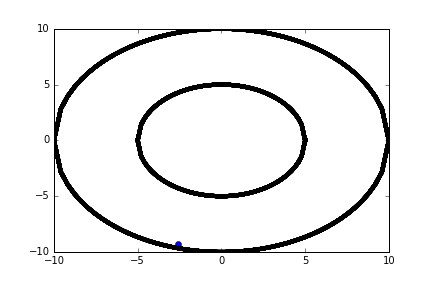
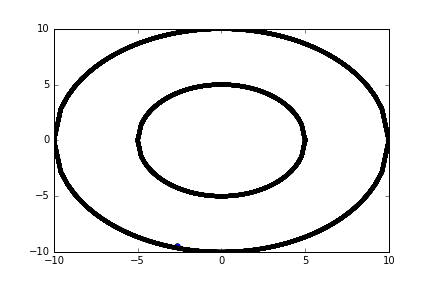
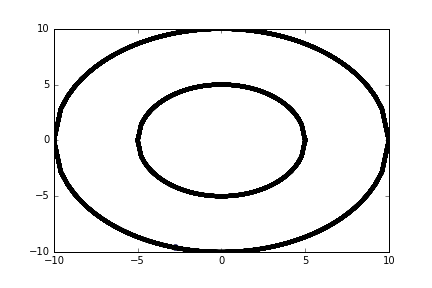
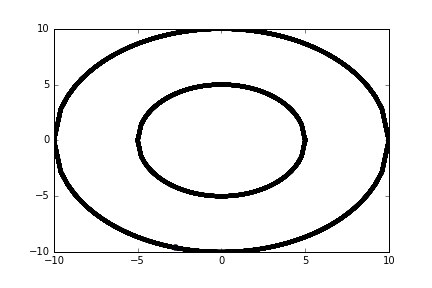
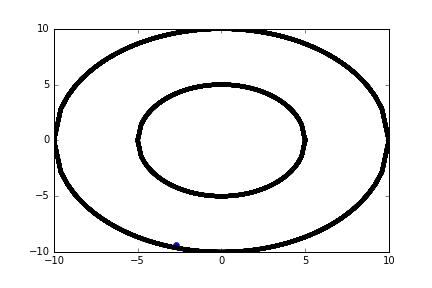
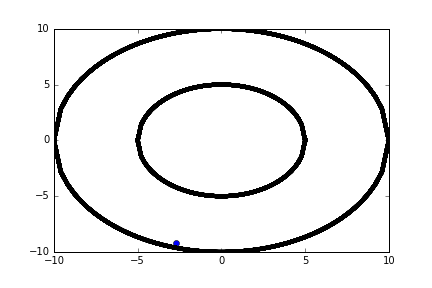
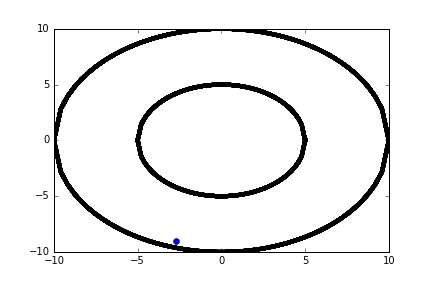
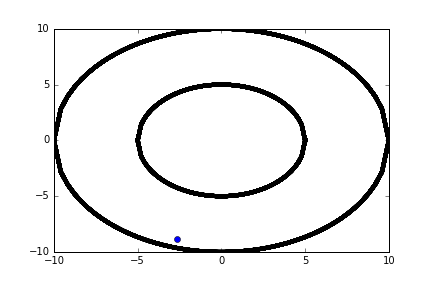
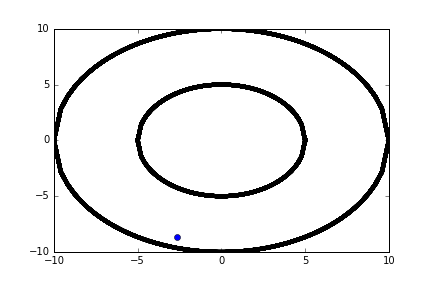
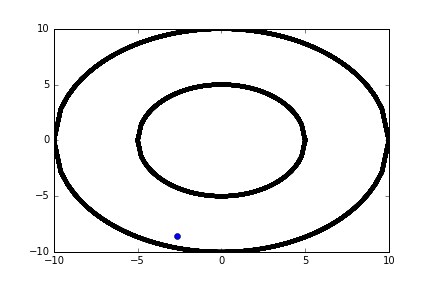
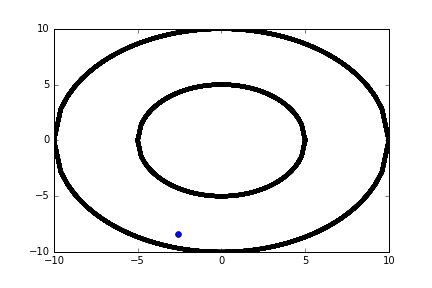
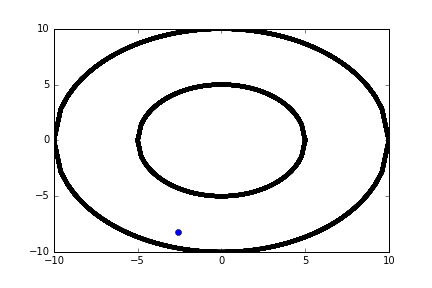
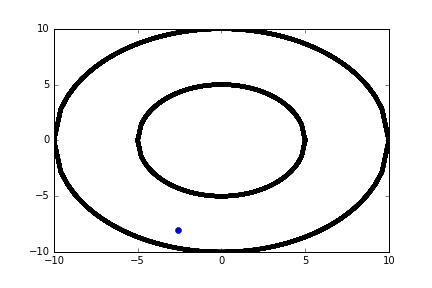
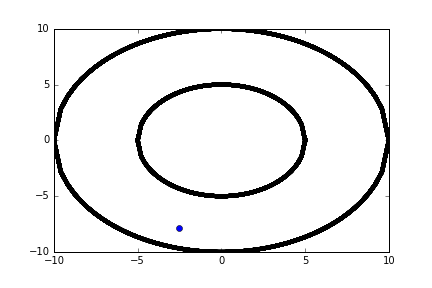
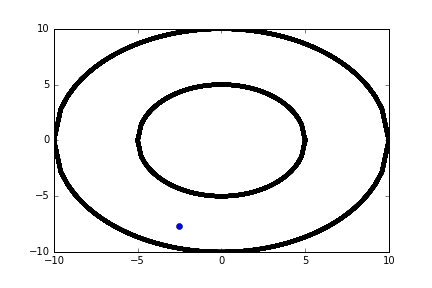
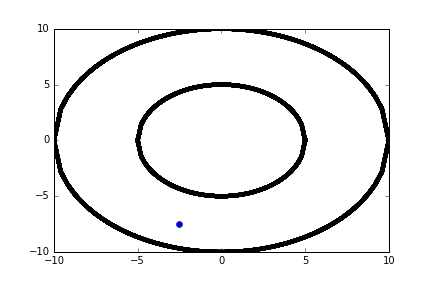
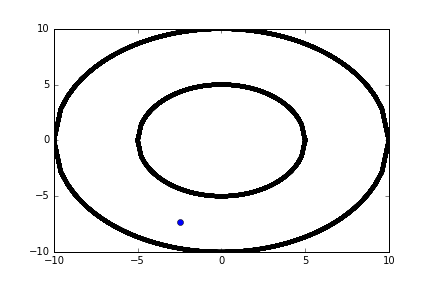
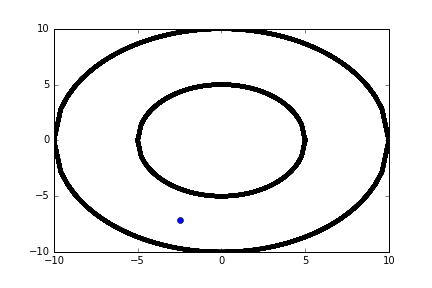
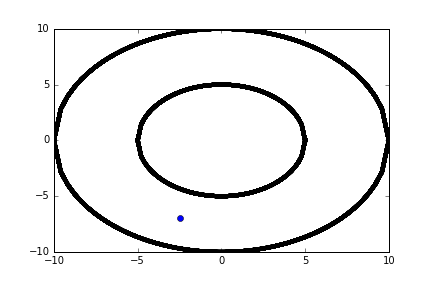
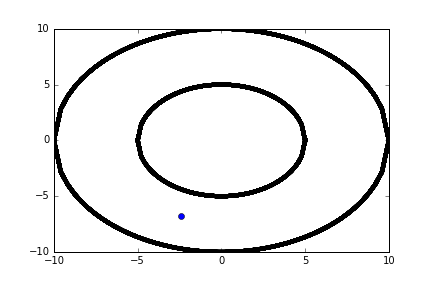
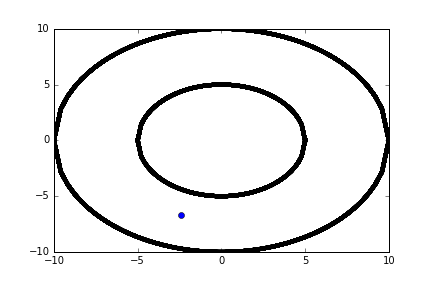
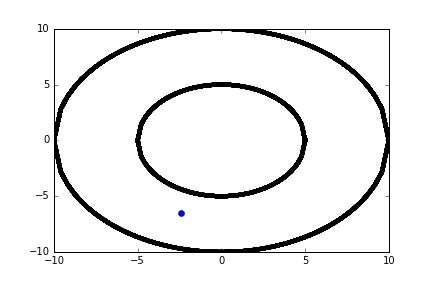
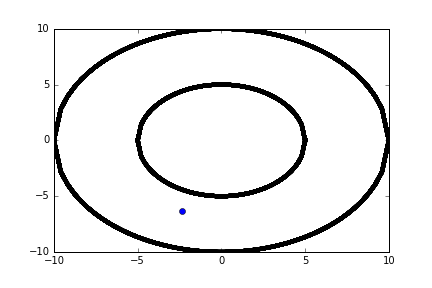
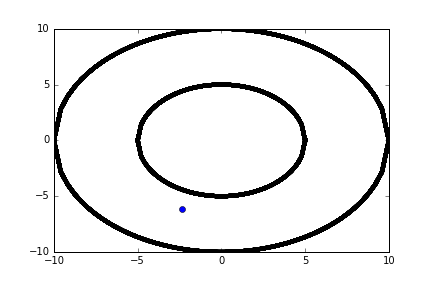
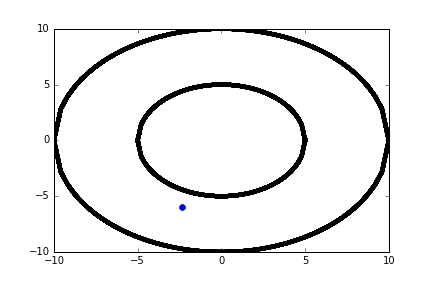
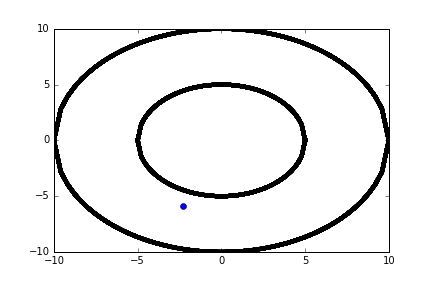
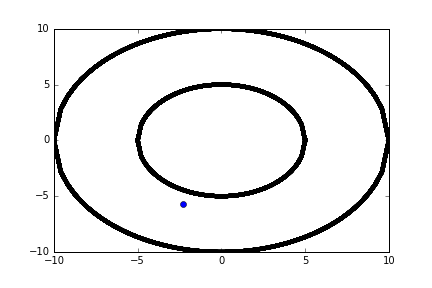
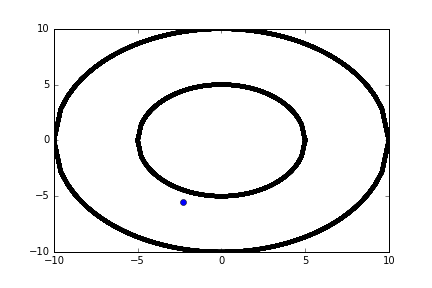
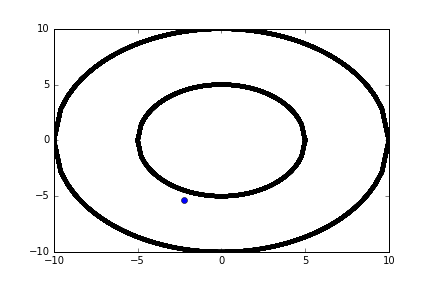
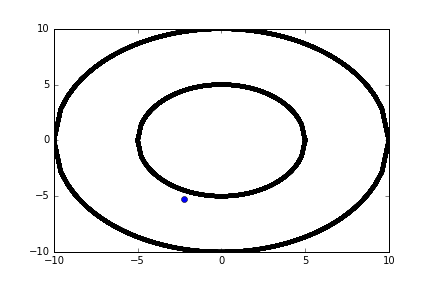
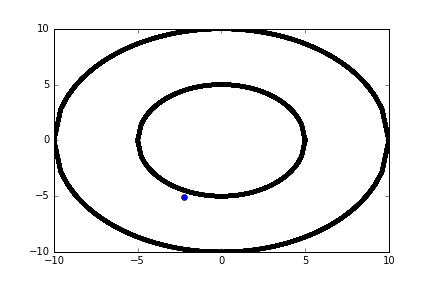
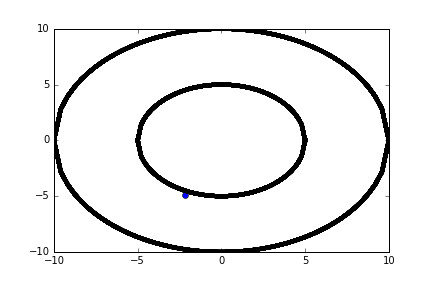
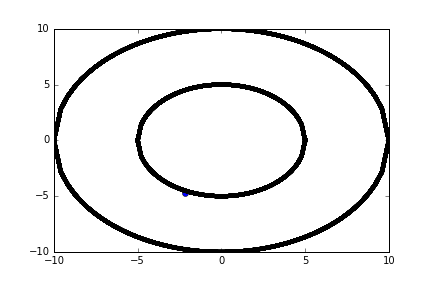
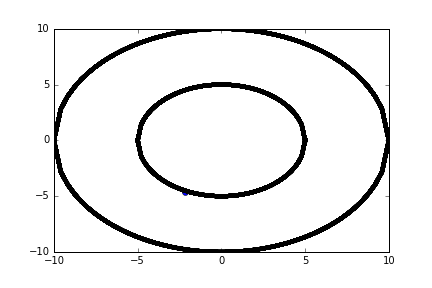
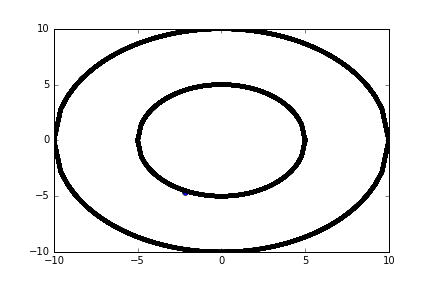
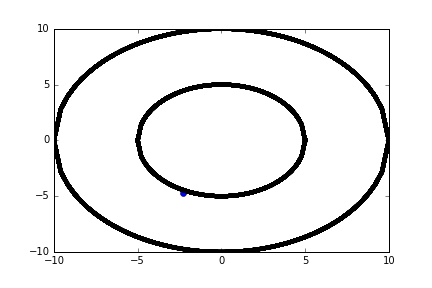
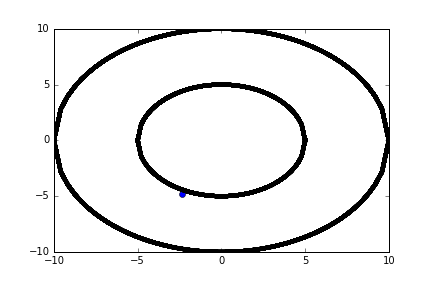
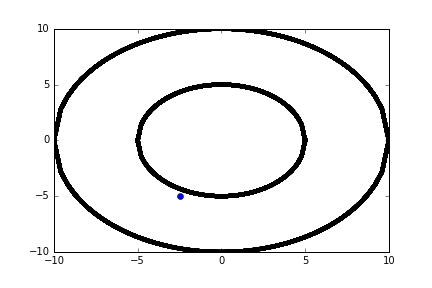
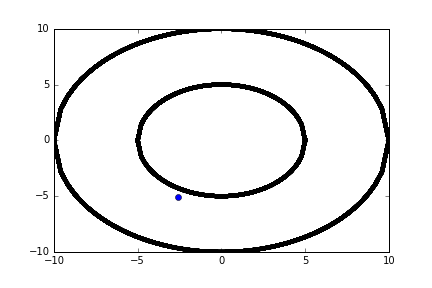
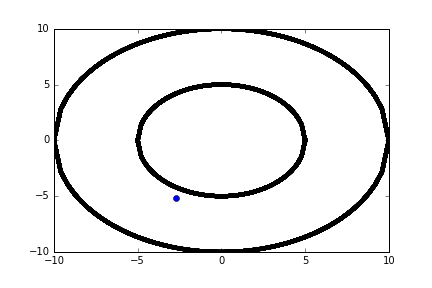
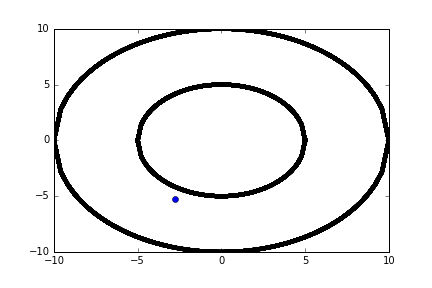
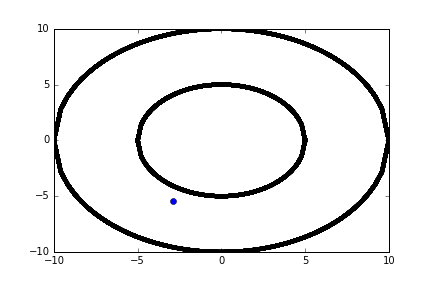
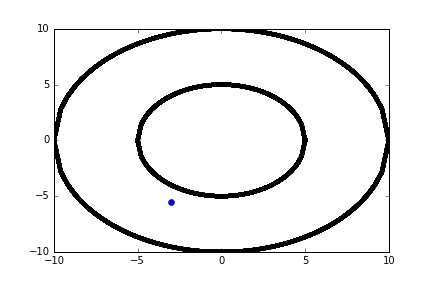
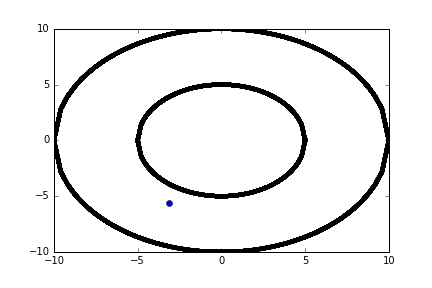
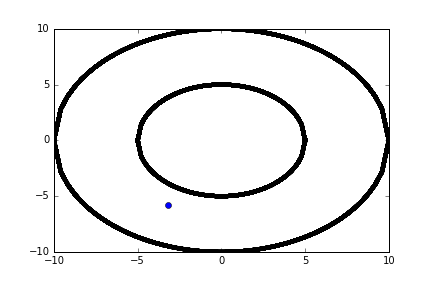
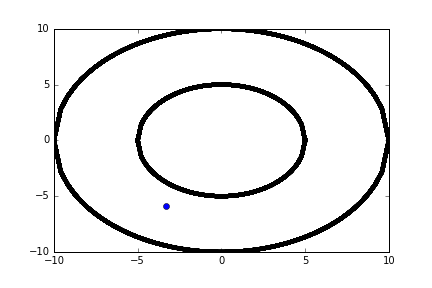
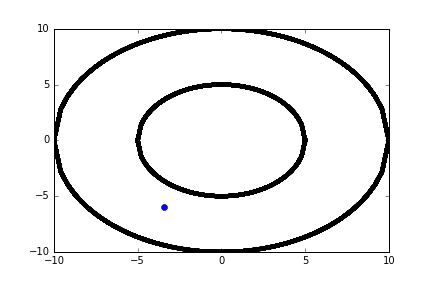
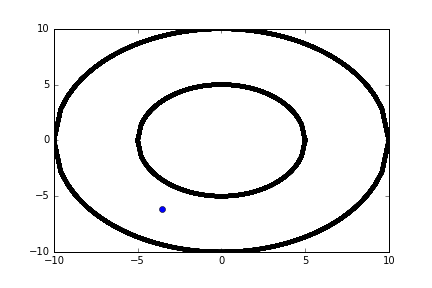
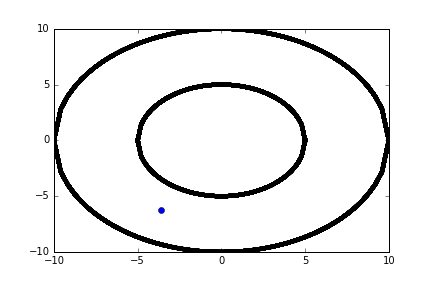
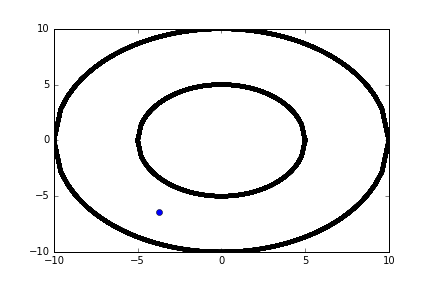
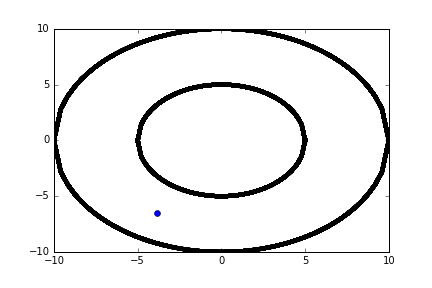
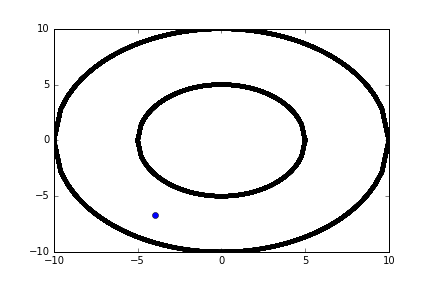
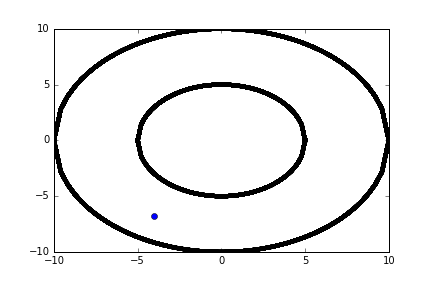
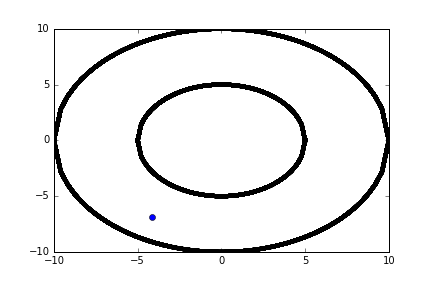
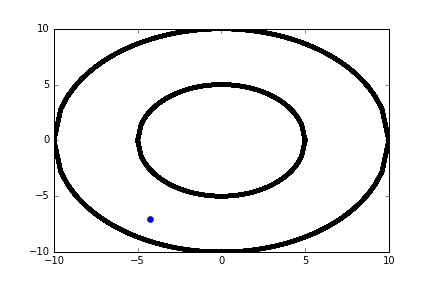
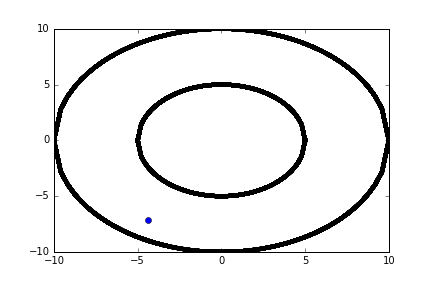
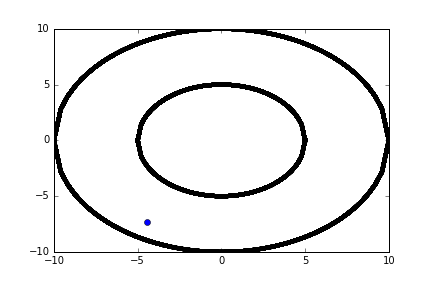
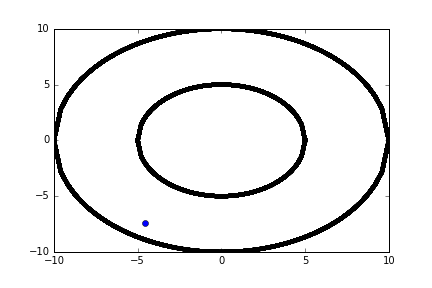
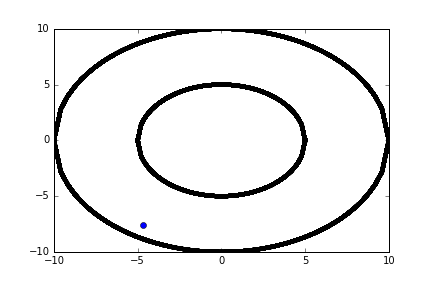
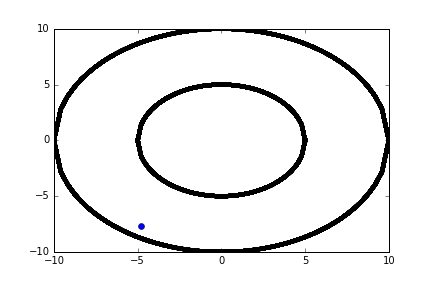
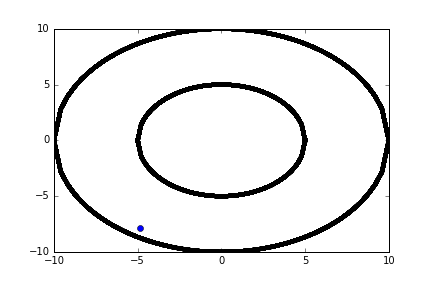
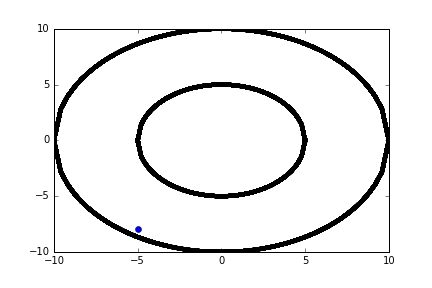
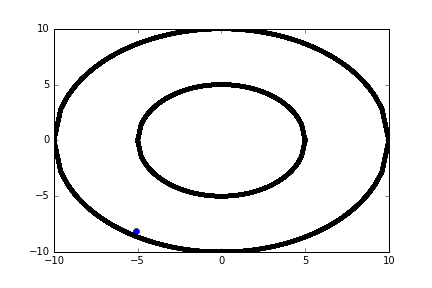
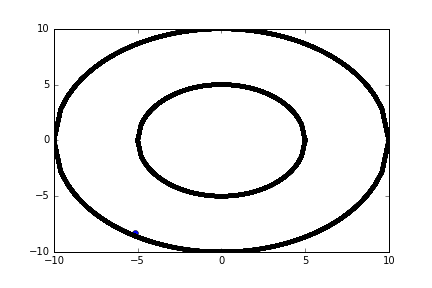
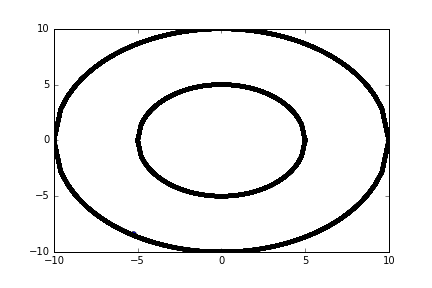

In [157]:
x_1 = linspace(-5,5)
x_2 = linspace(-10,10)
Inicio =  [6,3*pi/2,-15,-1]
sol =trayec_circ(Inicio,a,b,10000,0,.001)

figura = figure() #Crea la figura
ejes = axes(xlim=(-10,10),ylim=(-10,10))


punto, = ejes.plot([],[],'o')
def init():
    punto.set_data([],[])
    return  punto,  #Inicializa variables

def el_movimiento(i):  
    x,y = sol[:,0]*cos(sol[:,1]),sol[:,0]*sin(sol[:,1])
    punto.set_data(x[i],y[i])
    paredintar =ejes.plot(x_1,pared_circ(x_1,a)[0],lw = 4,color = 'k')
    paredintab =ejes.plot(x_1,pared_circ(x_1,a)[1],lw = 4,color = 'k')
    paredextar =ejes.plot(x_2,pared_circ(x_2,b)[0],lw = 4,color = 'k')
    paredextab =ejes.plot(x_2,pared_circ(x_2,b)[1],lw = 4,color = 'k')
    return trayectoria,punto
    
animation.FuncAnimation(figura,el_movimiento, init_func = init , frames =100,interval=34)
